# A Comprehensive Scientific Notebook: Diabetes Exploratory Analysis
In this notebook, we explore data cleaning, analysis, and statistical hypothesis testing on a diabetes dataset. We also demonstrate simulation tasks to illustrate sampling concepts and confidence interval coverage.


## Part A: Setup and Package Installation
Below, we define a custom library path and install required packages for data manipulation, visualization, and analysis.

In [1]:
lib_path <- "D:/R/library"

if (!file.exists(lib_path)) {
  dir.create(lib_path, recursive = TRUE)
}

In [2]:
install.packages("dplyr", lib = lib_path)
install.packages("ggplot2", lib = lib_path)
install.packages("tidyr", lib = lib_path)
install.packages("corrplot", lib = lib_path)
install.packages("Amelia", lib = lib_path)


package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\POP\AppData\Local\Temp\RtmpY1enea\downloaded_packages
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\POP\AppData\Local\Temp\RtmpY1enea\downloaded_packages
package 'tidyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\POP\AppData\Local\Temp\RtmpY1enea\downloaded_packages
package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\POP\AppData\Local\Temp\RtmpY1enea\downloaded_packages
package 'Amelia' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\POP\AppData\Local\Temp\RtmpY1enea\downloaded_packages


In [3]:
# Load necessary libraries
library(dplyr, lib.loc = lib_path)
library(ggplot2, lib.loc = lib_path)
library(tidyr, lib.loc = lib_path)
library(corrplot, lib.loc = lib_path)
library(Amelia, lib.loc = lib_path)

Warning message:
"package 'dplyr' was built under R version 4.4.2"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggplot2' was built under R version 4.4.2"
Warning message:
"package 'tidyr' was built under R version 4.4.2"
Warning message:
"package 'corrplot' was built under R version 4.4.2"
corrplot 0.95 loaded

Warning message:
"package 'Amelia' was built under R version 4.4.2"
Loading required package: Rcpp

Warning message:
"package 'Rcpp' was built under R version 4.4.2"
## 
## Amelia II: Multiple Imputation
## (Version 1.8.3, built: 2024-11-07)
## Copyright (C) 2005-2024 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



## Part B: Data Loading and Initial Exploration

In [4]:
# Load the dataset
data <- read.csv("diabetes_dataset.csv")

# 1. Data Format & Structure --------------------------------------------
# Examine the structure and summary of the dataset
str(data)
summary(data)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

In [5]:
# Check for potential anomalies
anomalous_cols <- c("Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI")
anomalies <- data %>% filter_at(vars(anomalous_cols), any_vars(. == 0))
print(paste("Number of rows with potential anomalies:", nrow(anomalies)))

Warning message:
"Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(anomalous_cols)

  # Now:
  data %>% select(all_of(anomalous_cols))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>."


[1] "Number of rows with potential anomalies: 376"


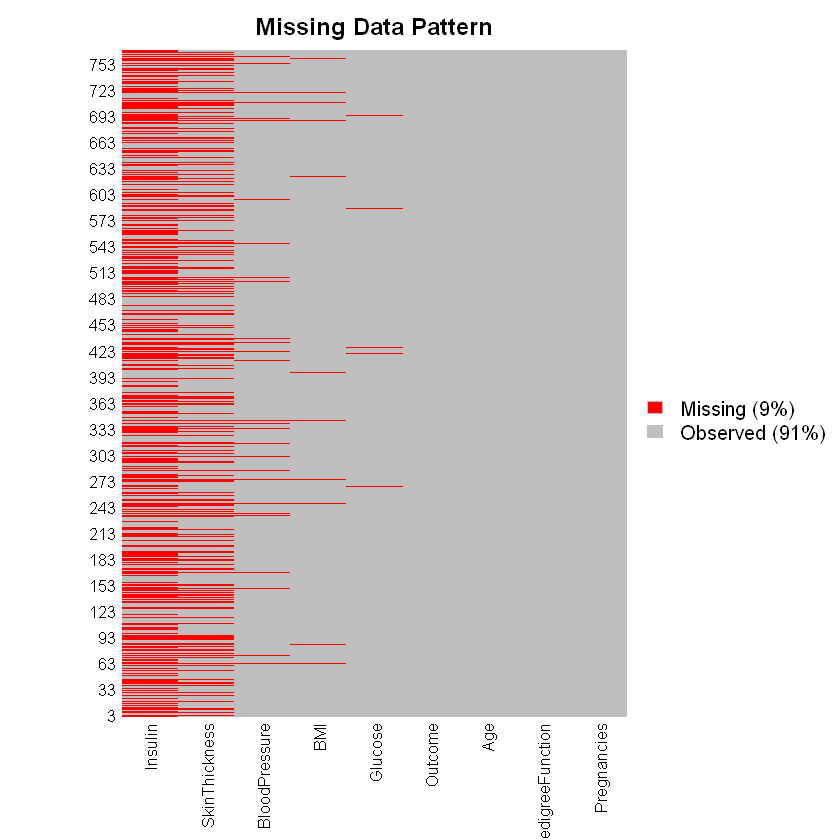

In [6]:
# Replace zeros with NA for specified columns
data <- data %>% mutate(across(all_of(anomalous_cols), ~na_if(., 0)))

# Check for missing data visually
missmap(data, main = "Missing Data Pattern", col = c("red", "grey"), legend = TRUE)

# Impute missing data using median values
data <- data %>% mutate(across(all_of(anomalous_cols), ~ifelse(is.na(.), median(., na.rm = TRUE), .)))

## Part C: Data Cleaning and Visualization

In [7]:
# 2. Health Context -----------------------------------------------------
# Summary after cleaning
summary(data)

  Pregnancies        Glucose       BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   : 44.00   Min.   : 24.00   Min.   : 7.00  
 1st Qu.: 1.000   1st Qu.: 99.75   1st Qu.: 64.00   1st Qu.:25.00  
 Median : 3.000   Median :117.00   Median : 72.00   Median :29.00  
 Mean   : 3.845   Mean   :121.66   Mean   : 72.39   Mean   :29.11  
 3rd Qu.: 6.000   3rd Qu.:140.25   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.00   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   : 14.0   Min.   :18.20   Min.   :0.0780           Min.   :21.00  
 1st Qu.:121.5   1st Qu.:27.50   1st Qu.:0.2437           1st Qu.:24.00  
 Median :125.0   Median :32.30   Median :0.3725           Median :29.00  
 Mean   :140.7   Mean   :32.46   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Ou

Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information."


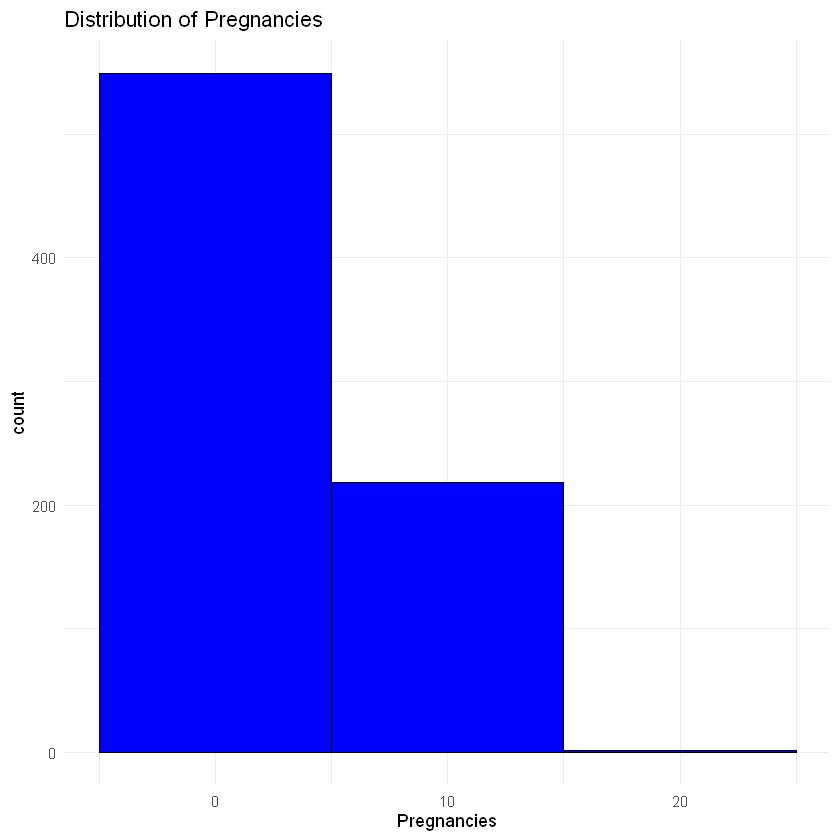

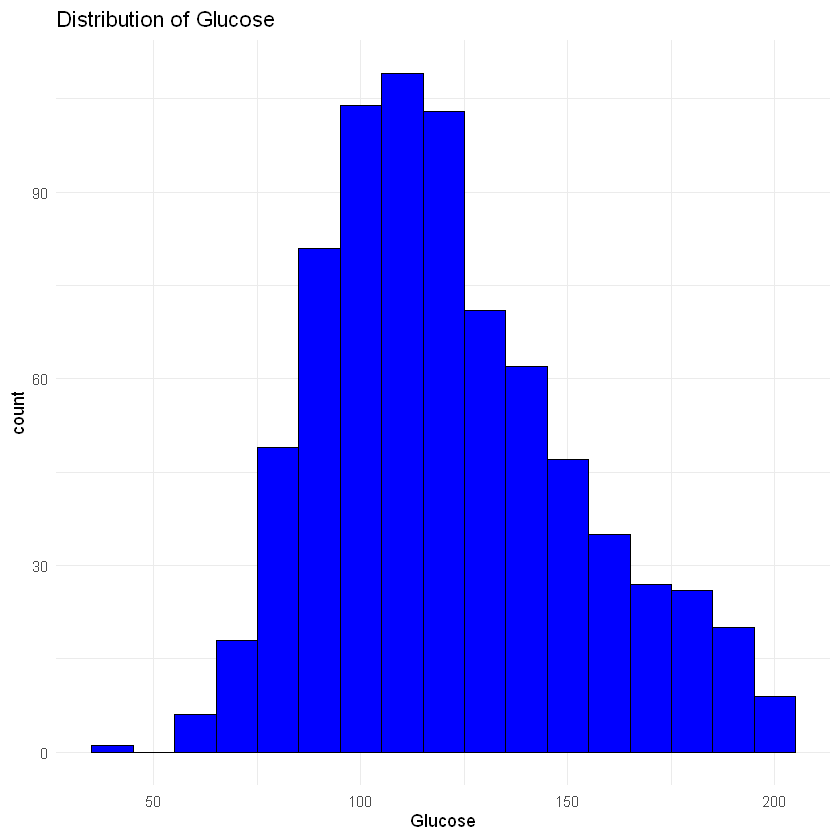

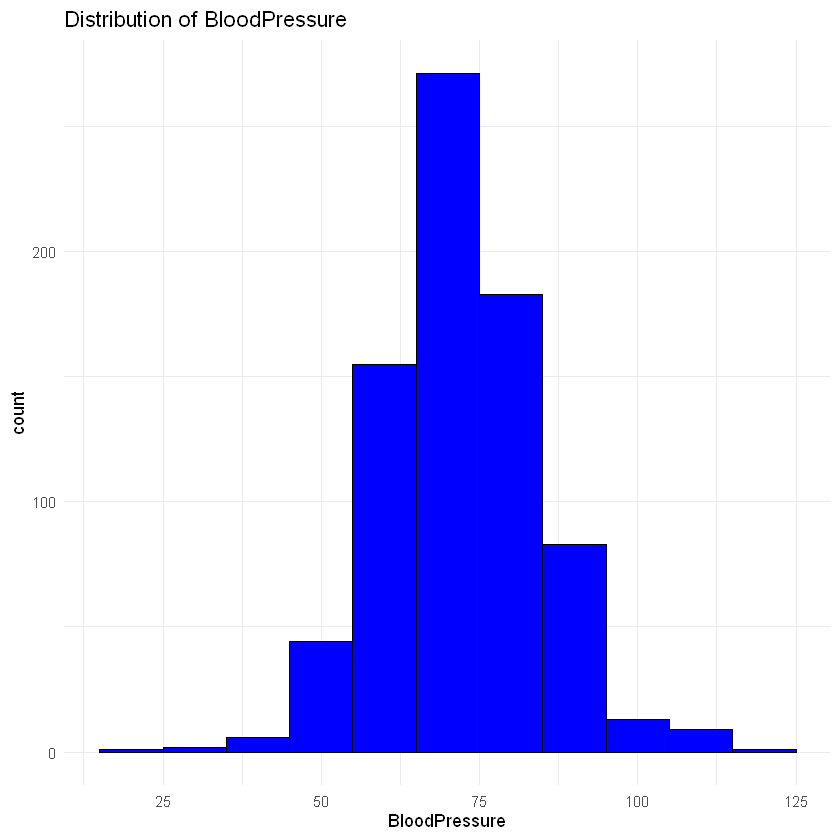

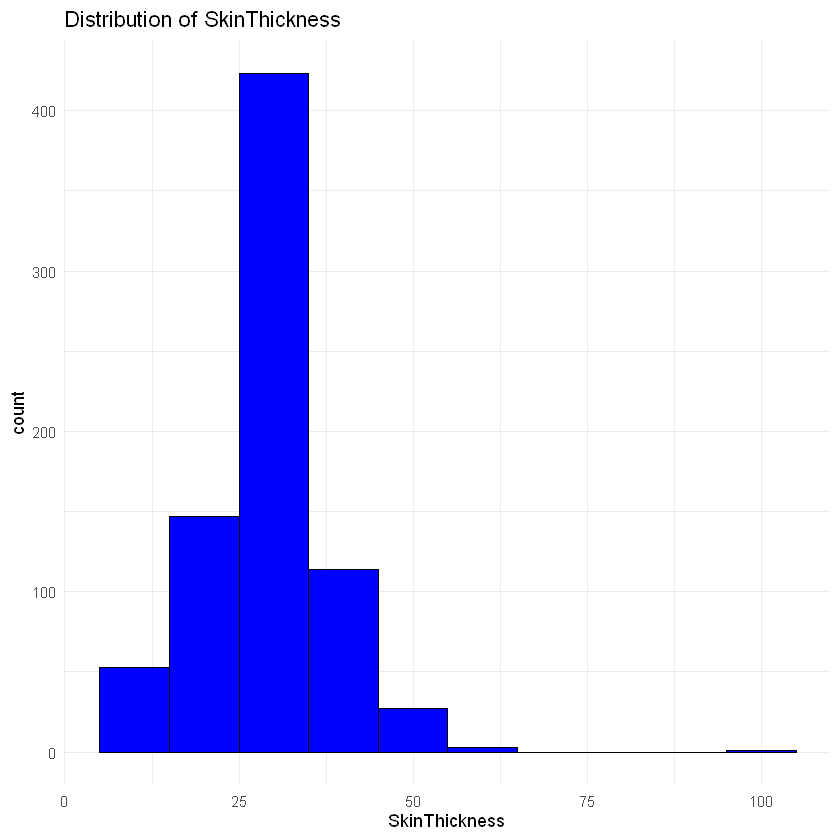

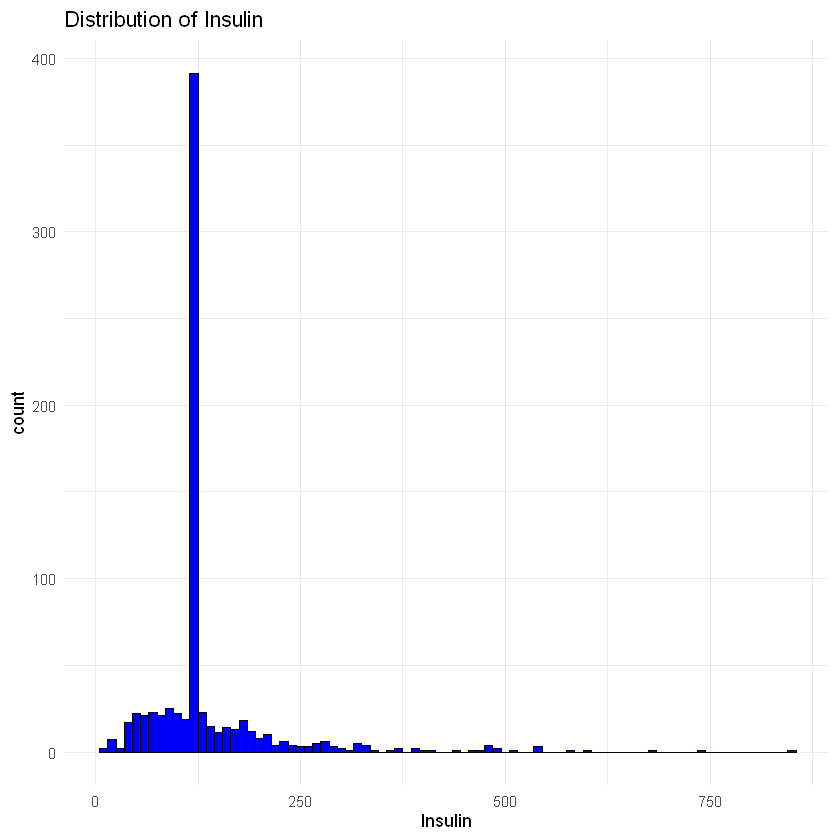

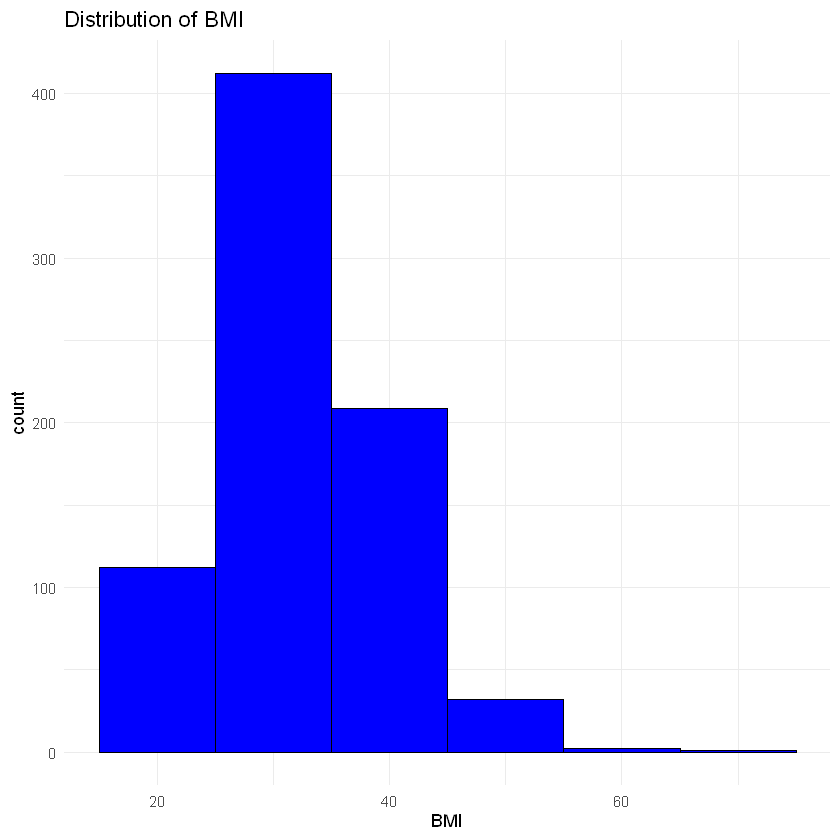

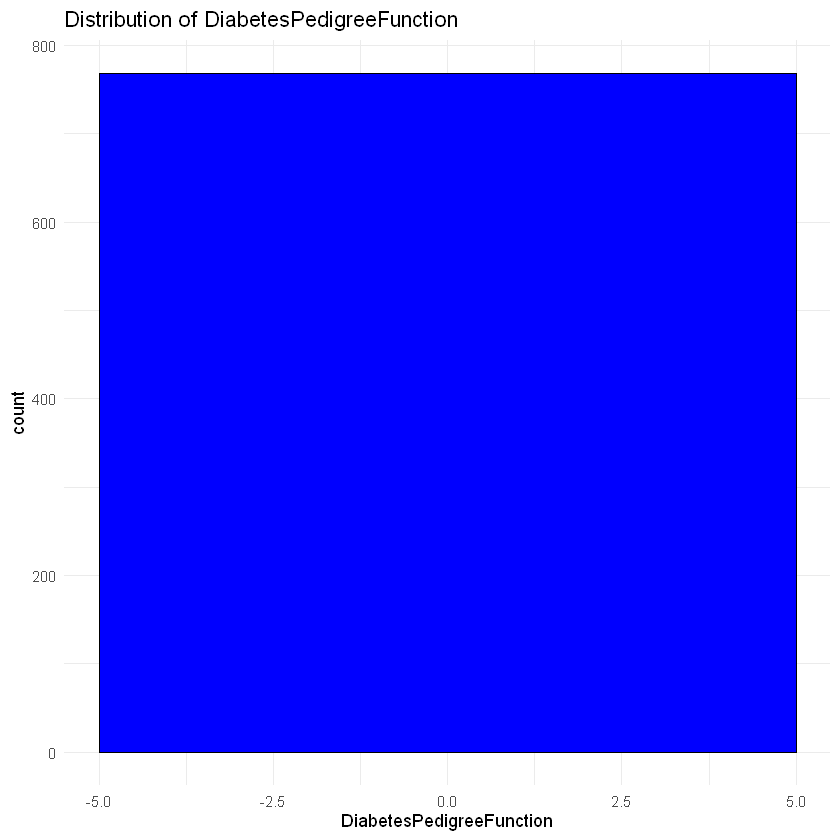

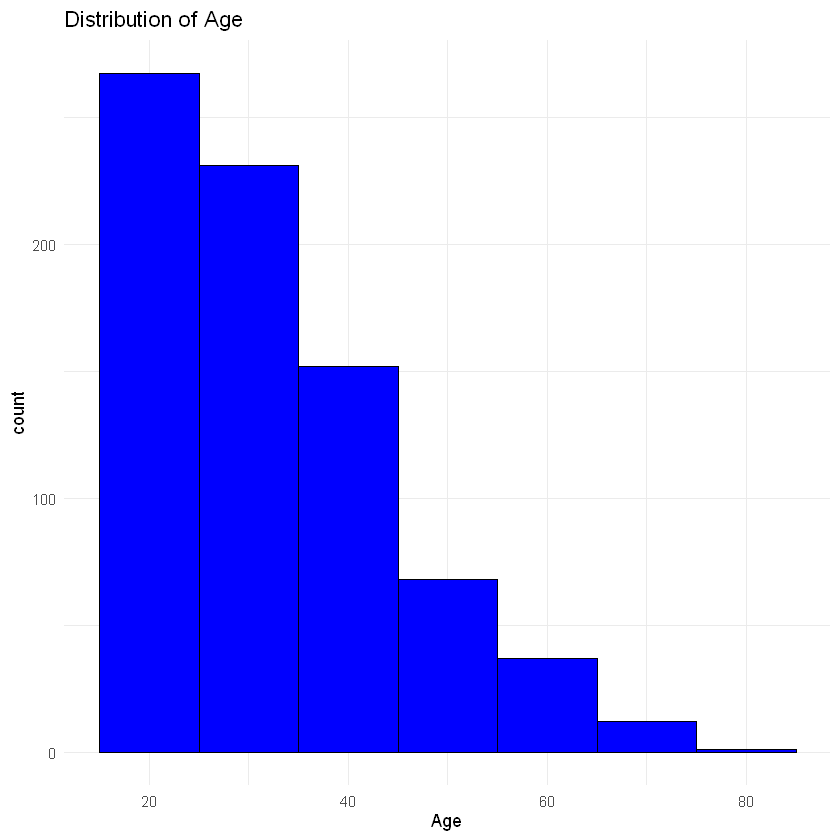

In [8]:
# Visualize distributions for key health features
features <- colnames(data)[-9]  # Exclude the Outcome column
for (feature in features) {
  print(ggplot(data, aes_string(x = feature)) +
          geom_histogram(binwidth = 10, fill = "blue", color = "black") +
          ggtitle(paste("Distribution of", feature)) +
          theme_minimal())
}

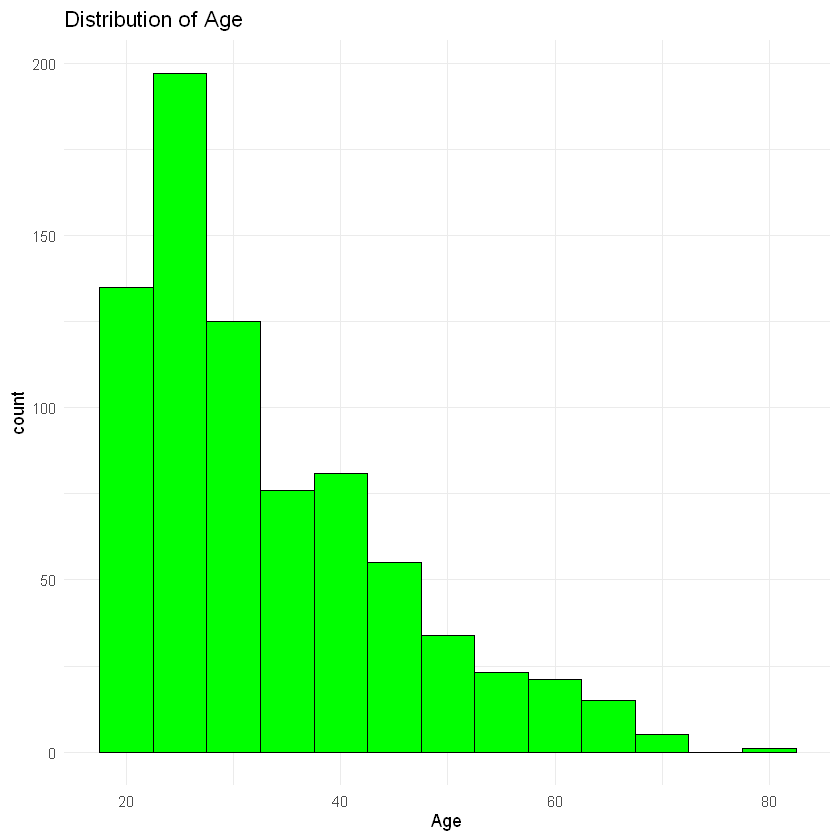

In [9]:
# 3. Scope & Generalizability ------------------------------------------
# Explore demographic insights (Age)
ggplot(data, aes(x = Age)) +
  geom_histogram(binwidth = 5, fill = "green", color = "black") +
  ggtitle("Distribution of Age") +
  theme_minimal()

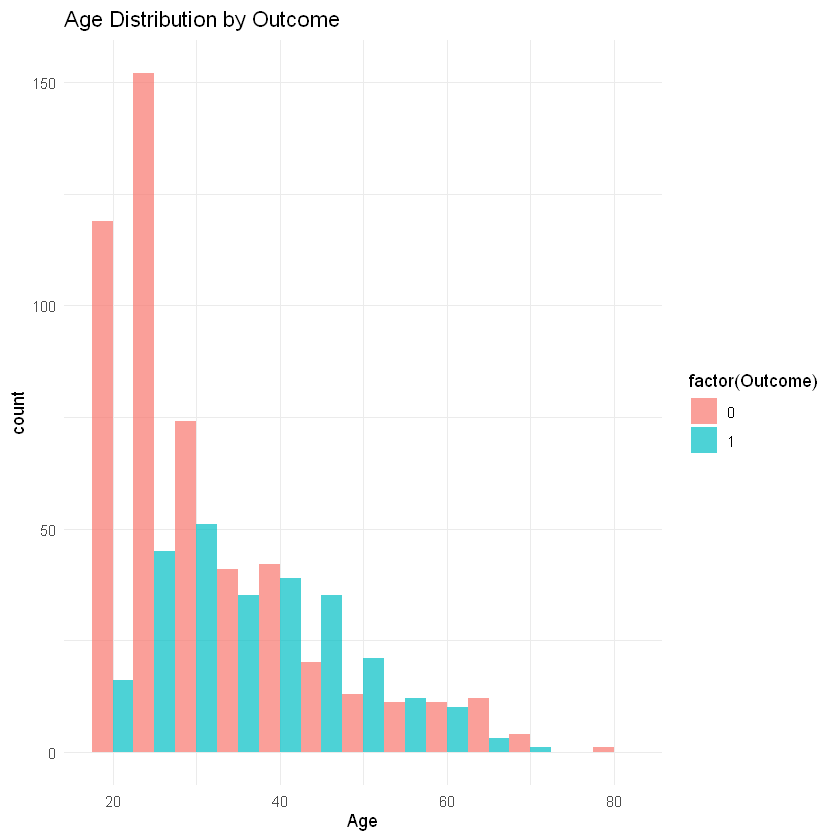

In [10]:
# Explore relationship of Age with Outcome
ggplot(data, aes(x = Age, fill = factor(Outcome))) +
  geom_histogram(binwidth = 5, position = "dodge", alpha = 0.7) +
  ggtitle("Age Distribution by Outcome") +
  theme_minimal()

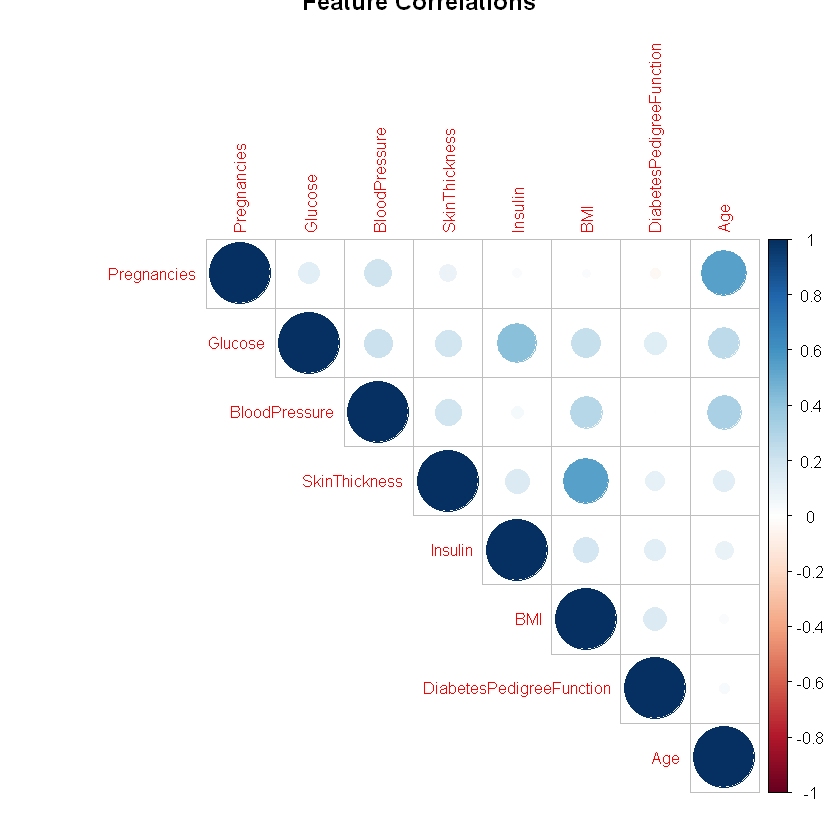

In [11]:
# 4. Correlations and Relationships ------------------------------------
# Correlation matrix
cor_matrix <- cor(data %>% select(-Outcome), use = "complete.obs")
corrplot(cor_matrix, method = "circle", type = "upper", tl.cex = 0.8, title = "Feature Correlations")


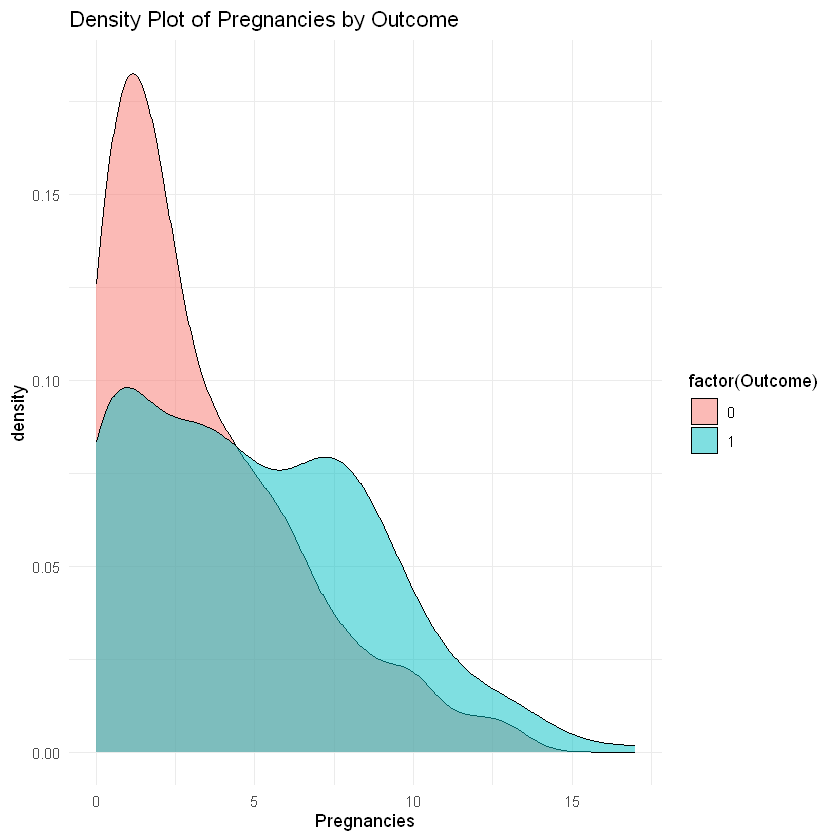

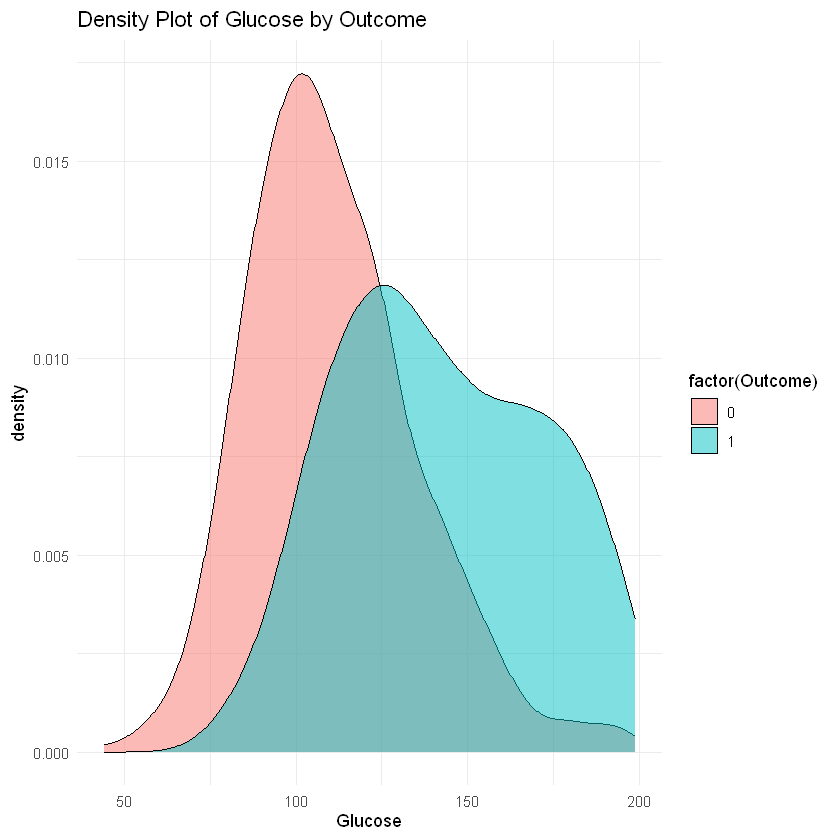

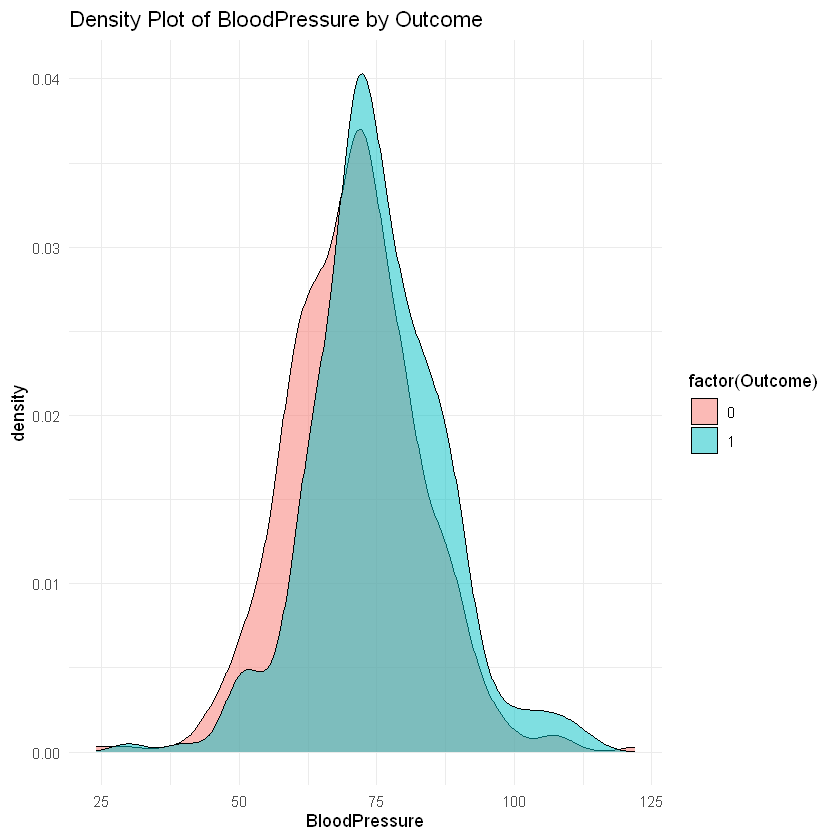

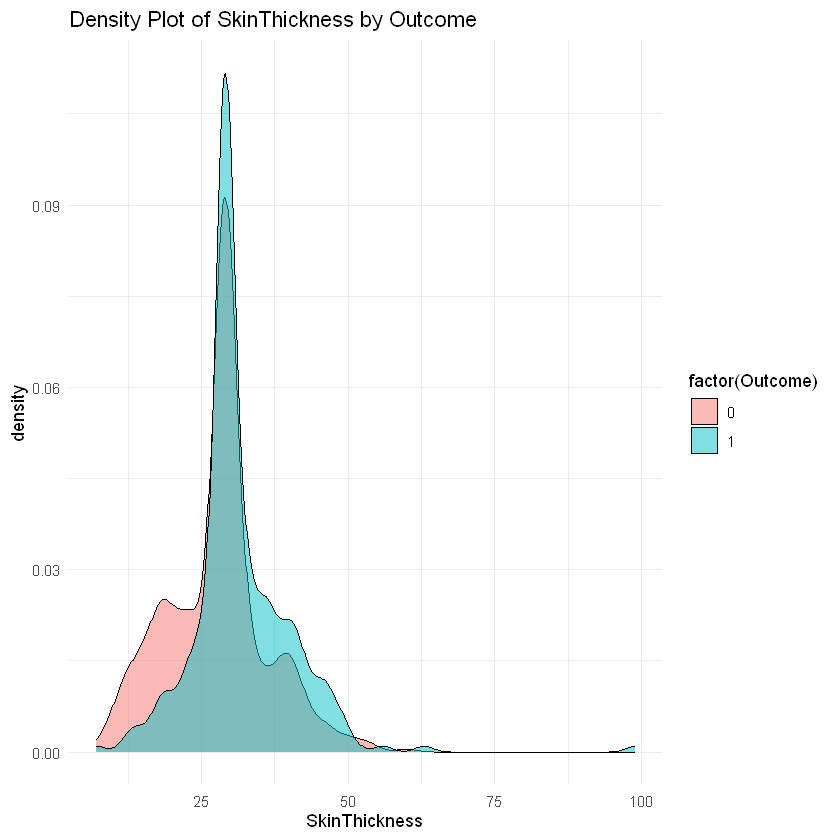

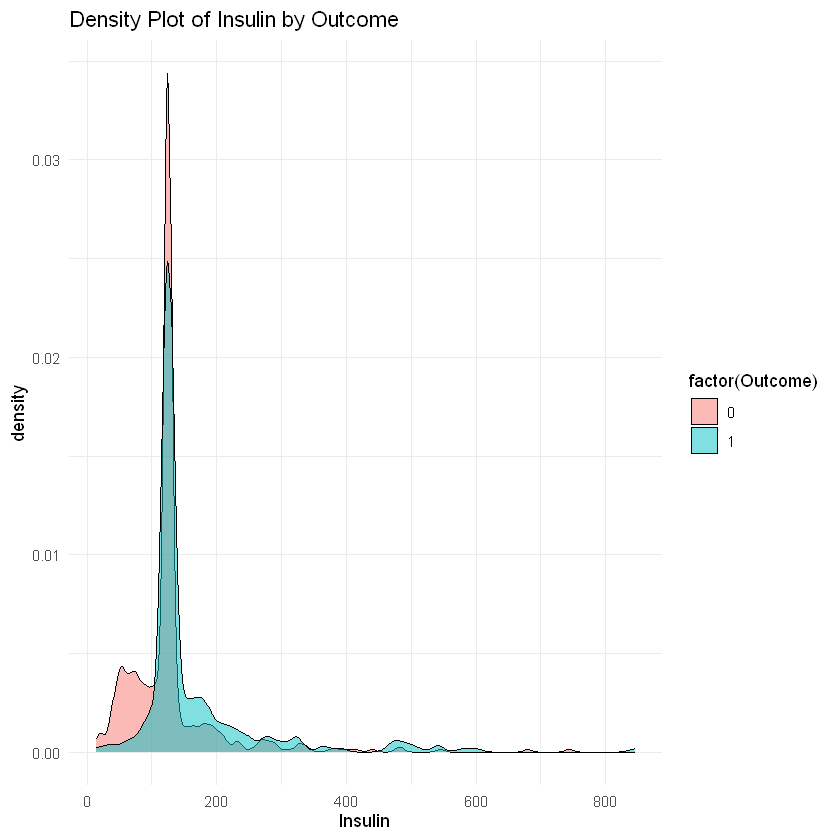

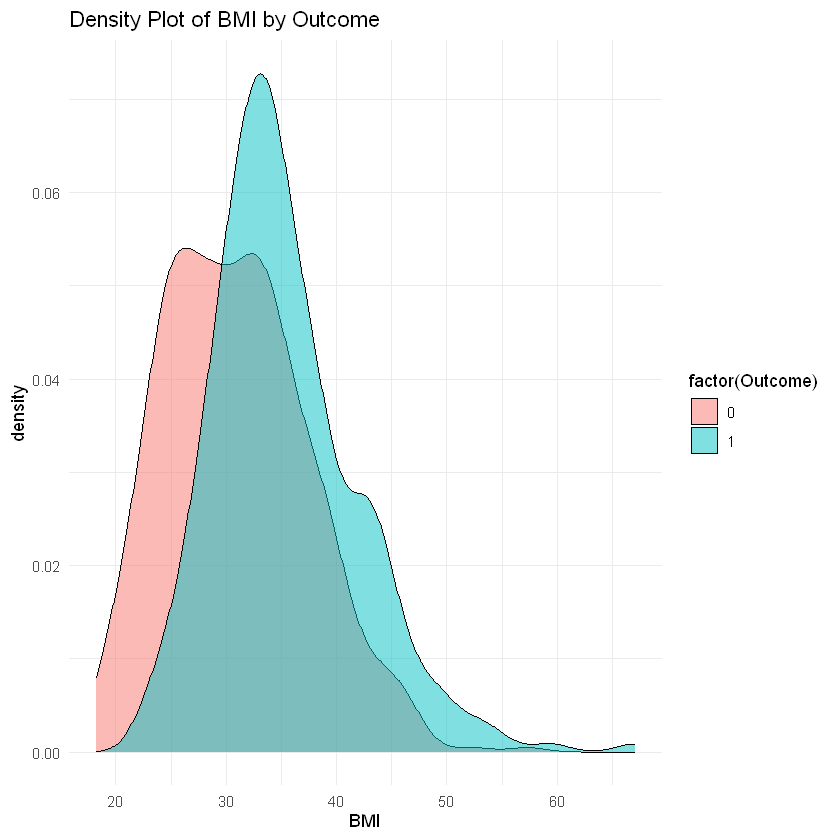

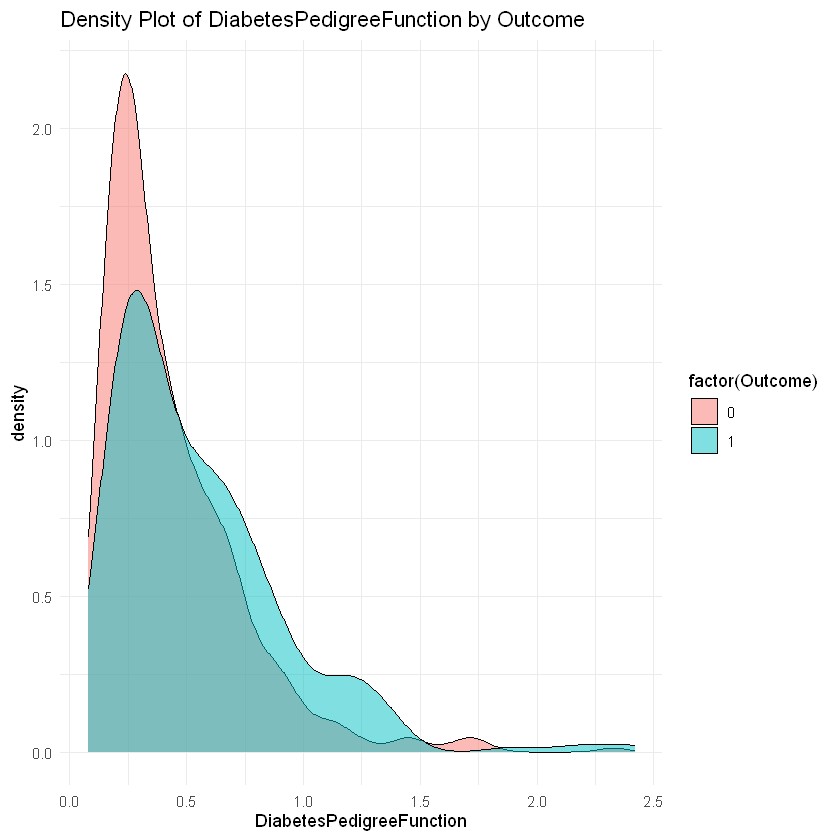

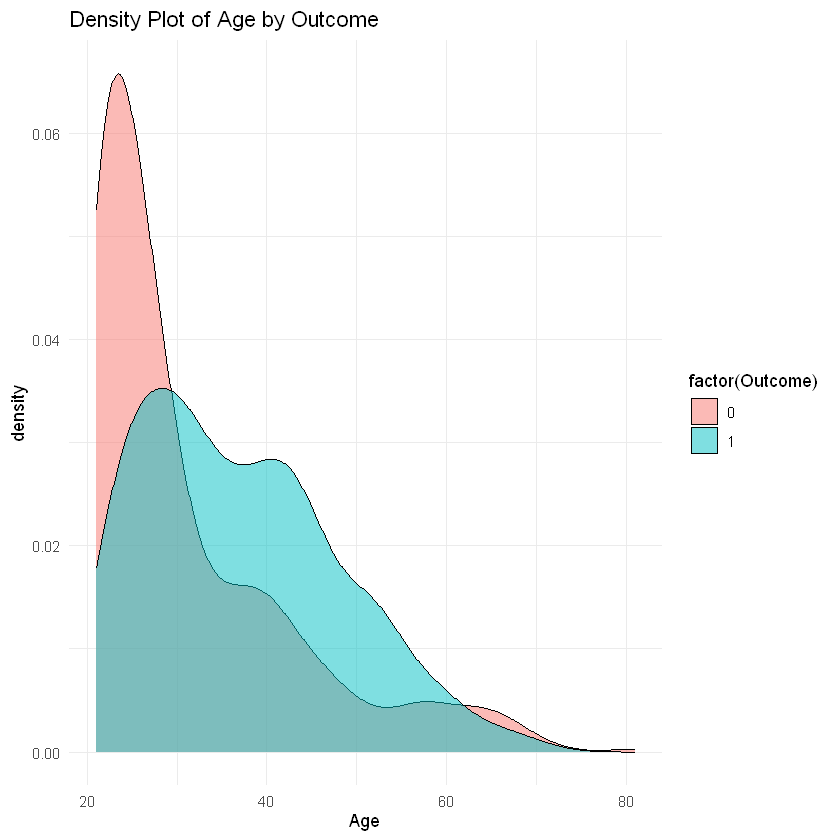

In [12]:
# Density plots for relationship with Outcome
for (feature in features) {
  print(ggplot(data, aes_string(x = feature, fill = "factor(Outcome)")) +
          geom_density(alpha = 0.5) +
          ggtitle(paste("Density Plot of", feature, "by Outcome")) +
          theme_minimal())
}

In [13]:
# 5. Save Clean Dataset -------------------------------------------------
#write.csv(data, "clean_diabetes_dataset.csv", row.names = FALSE)

--------------------------------------------------------------------------------------------------------------------------------------------------------

# PART 1: Exploratory Analysis:

## Average glucose levels among patients with and without diabetes
**Description**:   
This plot shows the distribution of glucose levels among diabetic and non-diabetic patients using a box plot. The x-axis represents diabetes status    `(0 = Non-Diabetic,  1 = Diabetic)`, and the y-axis represents glucose levels. The box plot highlights the differences in glucose level distributions between the two groups, allowing for a comparison of their central tendencies and variability.

# A tibble: 2 × 2
  Outcome Average_Glucose
    <int>           <dbl>
1       0            111.
2       1            142.


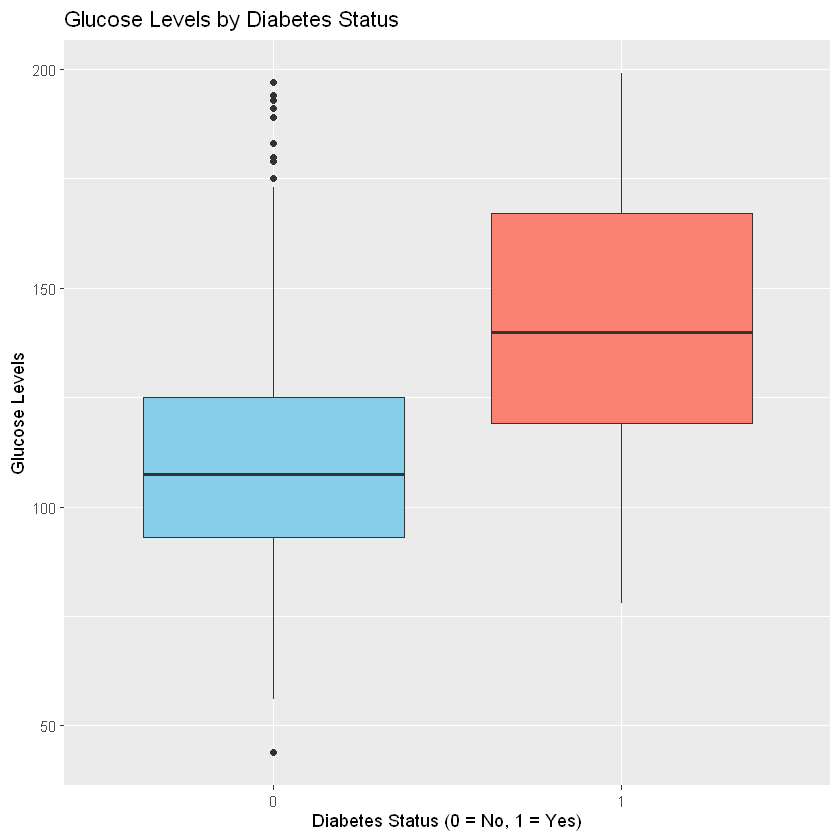

In [14]:
glucose_avg <- data %>% 
  group_by(Outcome) %>% 
  summarize(Average_Glucose = mean(Glucose, na.rm = TRUE))

# Display the summary
print(glucose_avg)

# Visualization
ggplot(data, aes(x = factor(Outcome), y = Glucose)) +
  geom_boxplot(fill = c("skyblue", "salmon")) +
  labs(x = "Diabetes Status (0 = No, 1 = Yes)", y = "Glucose Levels", title = "Glucose Levels by Diabetes Status")

## Average age of patients with and without diabetes
**Description:**  
This box plot visualizes the distribution of ages among diabetic and non-diabetic patients. The x-axis indicates diabetes status `(0 = Non-Diabetic, 1 = Diabetic)`, while the y-axis represents the patients' ages. The chart provides insights into whether age is a significant factor associated with diabetes.

# A tibble: 2 × 2
  Outcome Average_Age
    <int>       <dbl>
1       0        31.2
2       1        37.1


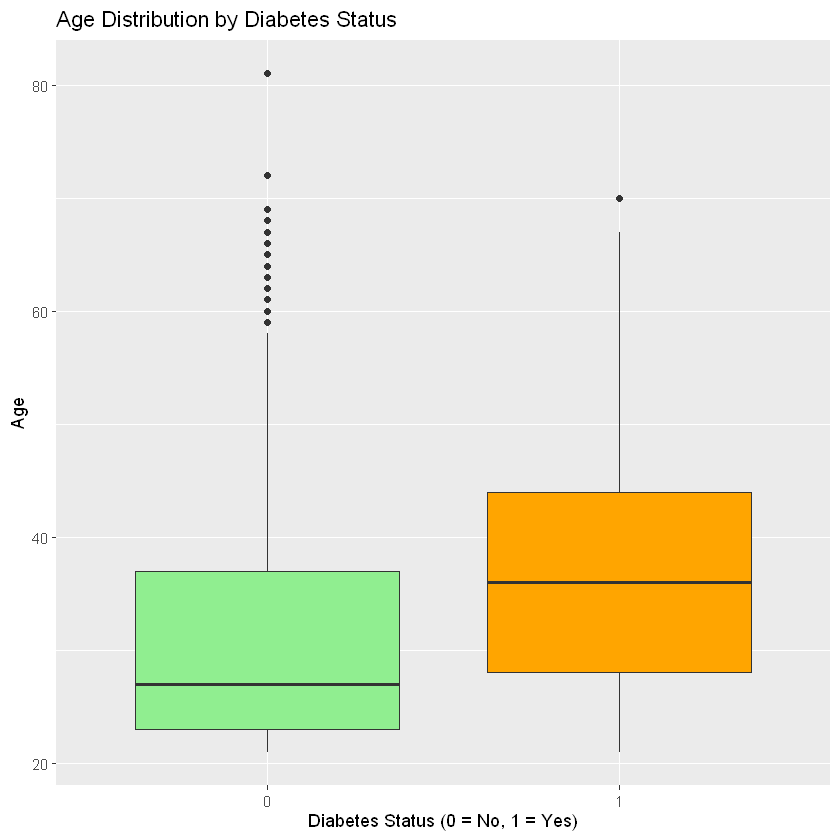

In [15]:
age_avg <- data %>% 
  group_by(Outcome) %>% 
  summarize(Average_Age = mean(Age, na.rm = TRUE))

# Display the summary
print(age_avg)

# Visualization
ggplot(data, aes(x = factor(Outcome), y = Age)) +
  geom_boxplot(fill = c("lightgreen", "orange")) +
  labs(x = "Diabetes Status (0 = No, 1 = Yes)", y = "Age", title = "Age Distribution by Diabetes Status")

## Average blood pressure measurements across diabetic and non-diabetic groups
**Description**:  
This box plot compares the distribution of blood pressure readings between diabetic and non-diabetic groups. The x-axis shows diabetes status `(0 = Non-Diabetic, 1 = Diabetic)`, and the y-axis represents blood pressure measurements. This plot is useful for examining whether blood pressure differs significantly between the two groups.

# A tibble: 2 × 2
  Outcome Average_BloodPressure
    <int>                 <dbl>
1       0                  70.9
2       1                  75.1


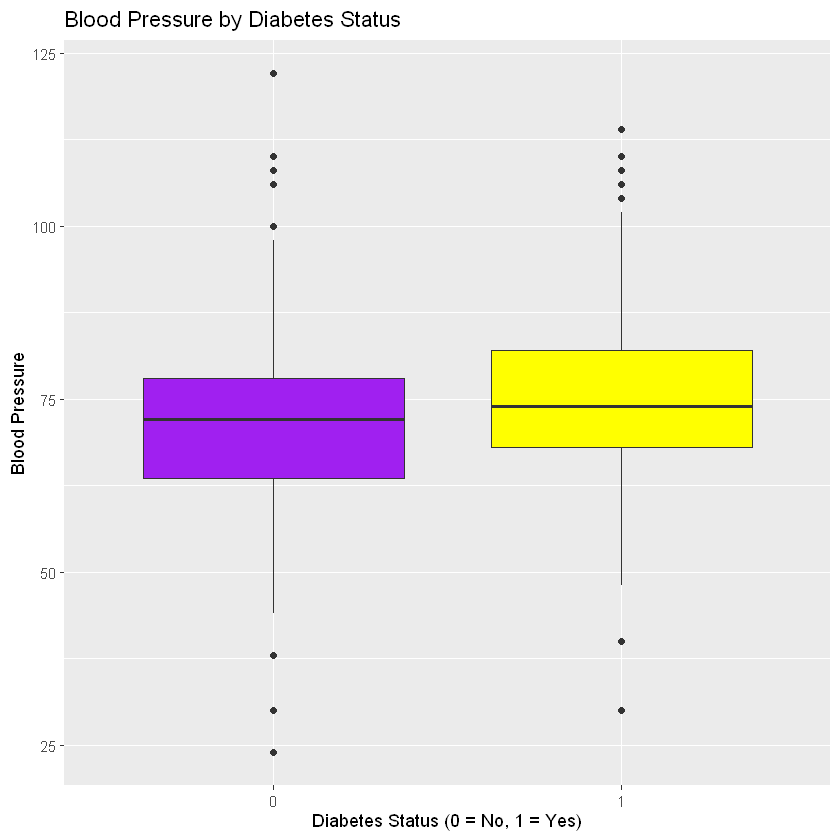

In [16]:
bp_avg <- data %>% 
  group_by(Outcome) %>% 
  summarize(Average_BloodPressure = mean(BloodPressure, na.rm = TRUE))

# Display the summary
print(bp_avg)

# Visualization
ggplot(data, aes(x = factor(Outcome), y = BloodPressure)) +
  geom_boxplot(fill = c("purple", "yellow")) +
  labs(x = "Diabetes Status (0 = No, 1 = Yes)", y = "Blood Pressure", title = "Blood Pressure by Diabetes Status")

## Average BMI of diabetic versus non-diabetic patients
**Description**:   
This plot displays the distribution of Body Mass Index (BMI) values among diabetic and non-diabetic patients using a box plot. The x-axis represents diabetes status `(0 = Non-Diabetic, 1 = Diabetic)`, and the y-axis shows BMI values. This visualization helps determine if BMI is a contributing factor to diabetes.

# A tibble: 2 × 2
  Outcome Average_BMI
    <int>       <dbl>
1       0        30.9
2       1        35.4


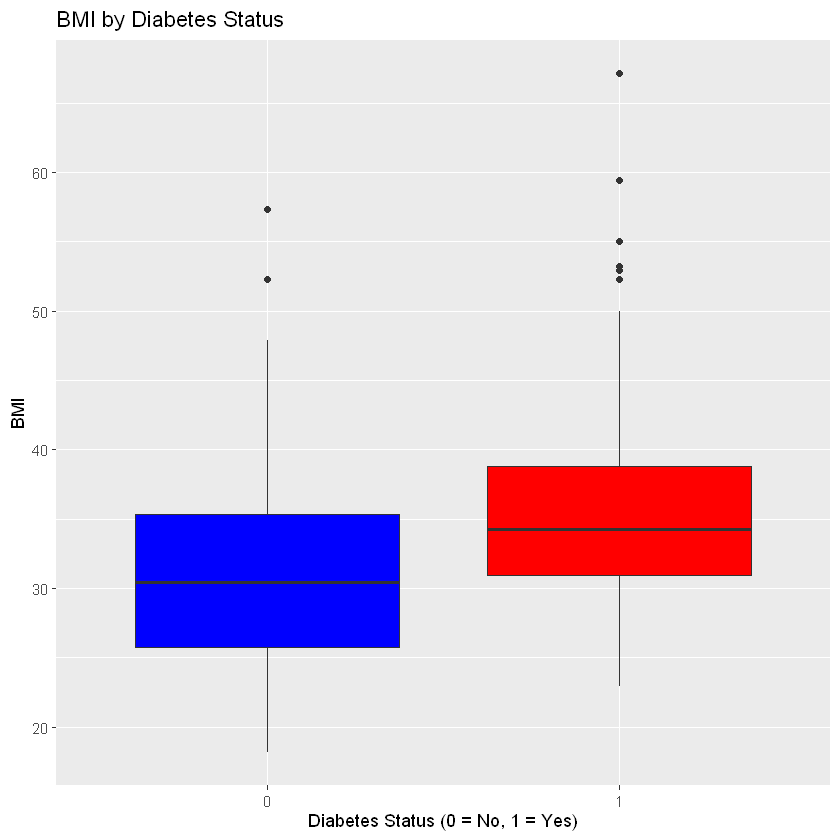

In [17]:
# Cell 5: Average BMI of diabetic versus non-diabetic patients
bmi_avg <- data %>% 
  group_by(Outcome) %>% 
  summarize(Average_BMI = mean(BMI, na.rm = TRUE))

# Display the summary
print(bmi_avg)

# Visualization
ggplot(data, aes(x = factor(Outcome), y = BMI)) +
  geom_boxplot(fill = c("blue", "red")) +
  labs(x = "Diabetes Status (0 = No, 1 = Yes)", y = "BMI", title = "BMI by Diabetes Status")

## Rate of diabetes among patients in the dataset
**Description**:  
This bar chart shows the count of patients with and without diabetes. The x-axis represents diabetes status `(0 = Non-Diabetic, 1 = Diabetic)`, and the y-axis indicates the count of patients. It provides a quick overview of the proportion of diabetic versus non-diabetic patients in the dataset.

  Diabetes_Rate
1     0.3489583


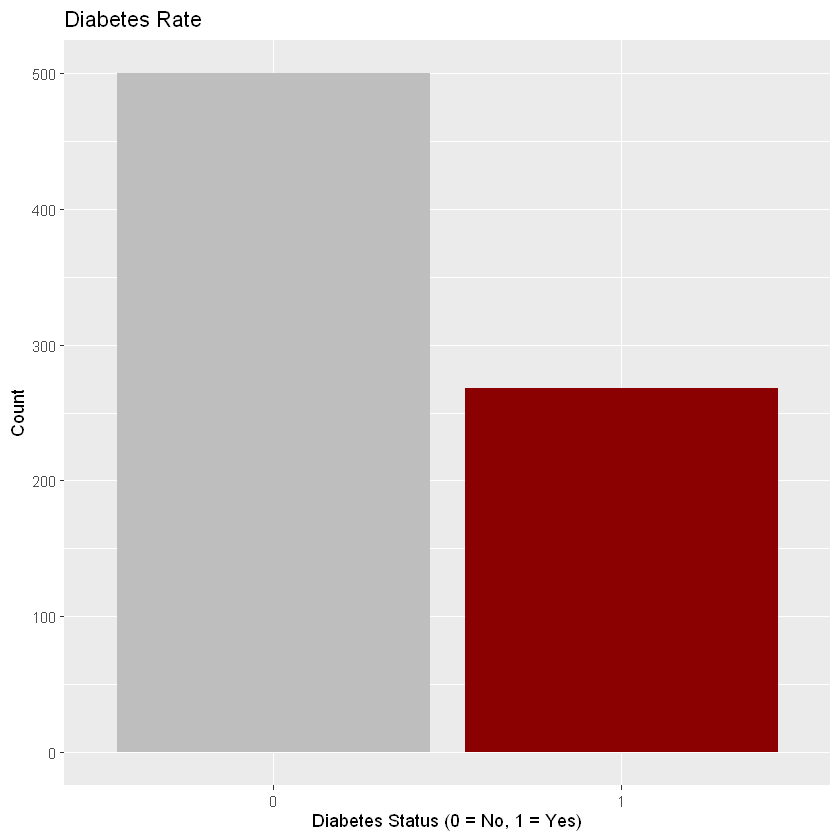

In [18]:
# Cell 6: Rate of diabetes among patients in the dataset
diabetes_rate <- data %>% 
  summarize(Diabetes_Rate = mean(Outcome))

# Display the rate
print(diabetes_rate)

# Visualization
ggplot(data, aes(x = factor(Outcome))) +
  geom_bar(fill = c("gray", "darkred")) +
  labs(x = "Diabetes Status (0 = No, 1 = Yes)", y = "Count", title = "Diabetes Rate")

## Distribution of BMI values among all patients
**Description**:  
This histogram depicts the distribution of BMI values across all patients. The x-axis represents BMI values, and the y-axis shows the frequency of occurrences. It helps visualize the overall spread and skewness of BMI data within the population.

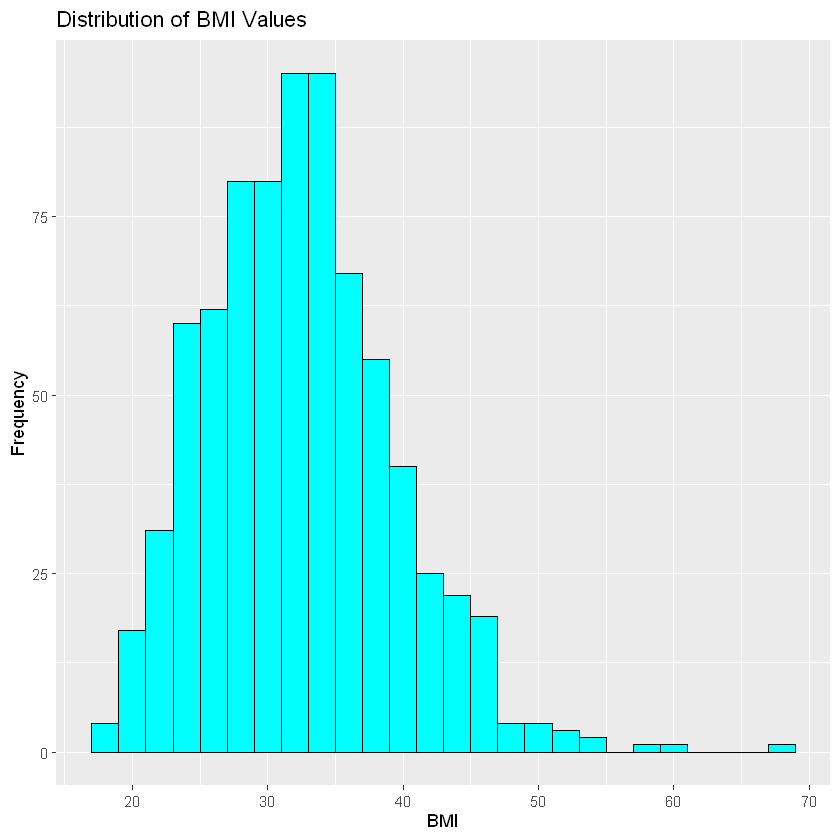

In [19]:
ggplot(data, aes(x = BMI)) +
  geom_histogram(binwidth = 2, fill = "cyan", color = "black") +
  labs(x = "BMI", y = "Frequency", title = "Distribution of BMI Values")

## Distribution of DPF values for diabetic and non-diabetic patients
**Description**:   
This density plot illustrates the distribution of Diabetes Pedigree Function (DPF) values among diabetic and non-diabetic patients. The x-axis represents DPF values, while the y-axis indicates density. The plot is color-coded by diabetes status `(0 = Non-Diabetic, 1 = Diabetic)`, highlighting differences in the genetic predisposition to diabetes between the groups.

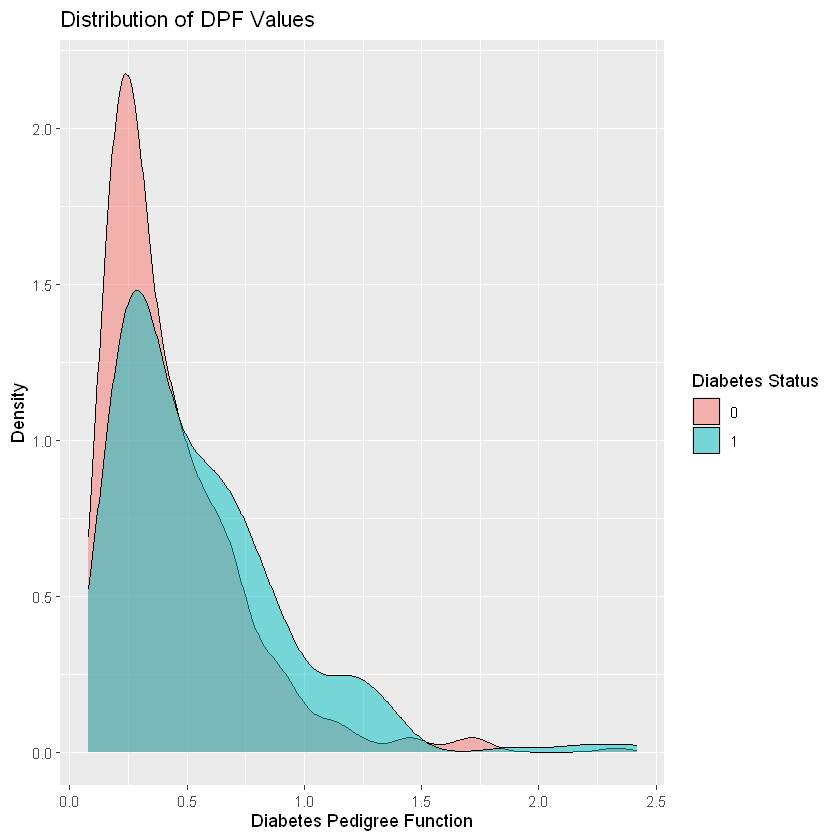

In [20]:
# Cell 8: Distribution of DPF values for diabetic and non-diabetic patients
ggplot(data, aes(x = DiabetesPedigreeFunction, fill = factor(Outcome))) +
  geom_density(alpha = 0.5) +
  labs(x = "Diabetes Pedigree Function", y = "Density", fill = "Diabetes Status", title = "Distribution of DPF Values")

## Relationship between the number of pregnancies and diabetes occurrence
**Description**:   
This box plot compares the distribution of the number of pregnancies for diabetic and non-diabetic patients. The x-axis shows diabetes status `(0 = Non-Diabetic, 1 = Diabetic)`, and the y-axis represents the number of pregnancies. This visualization can reveal if having more pregnancies is associated with a higher likelihood of diabetes.

# A tibble: 2 × 2
  Outcome Average_Pregnancies
    <int>               <dbl>
1       0                3.30
2       1                4.87


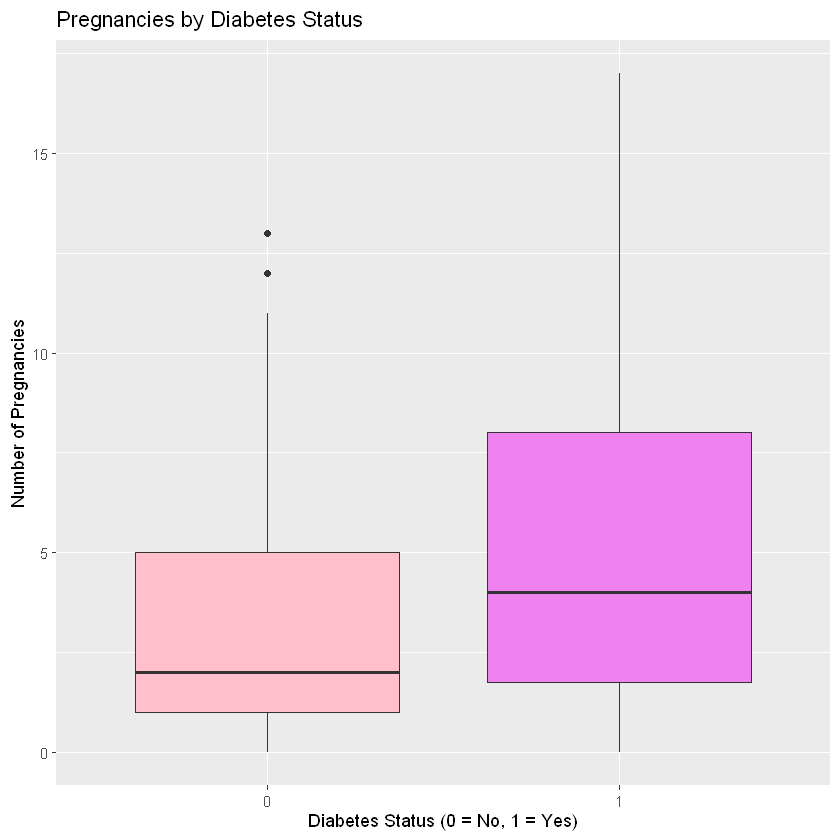

In [21]:
pregnancy_avg <- data %>% 
  group_by(Outcome) %>% 
  summarize(Average_Pregnancies = mean(Pregnancies, na.rm = TRUE))

# Display the summary
print(pregnancy_avg)

# Visualization
ggplot(data, aes(x = factor(Outcome), y = Pregnancies)) +
  geom_boxplot(fill = c("pink", "violet")) +
  labs(x = "Diabetes Status (0 = No, 1 = Yes)", y = "Number of Pregnancies", title = "Pregnancies by Diabetes Status")


## Correlation between glucose levels and BMI
**Description**:   
This scatter plot illustrates the relationship between BMI and glucose levels. The x-axis represents BMI, and the y-axis shows glucose levels. A linear regression line is added using `geom_smooth()` with the formula `y ~ x`. This visualization helps in understanding the correlation between these two variables and the trend of glucose levels as BMI changes.

[1] "Correlation between Glucose and BMI: 0.231048550402383"


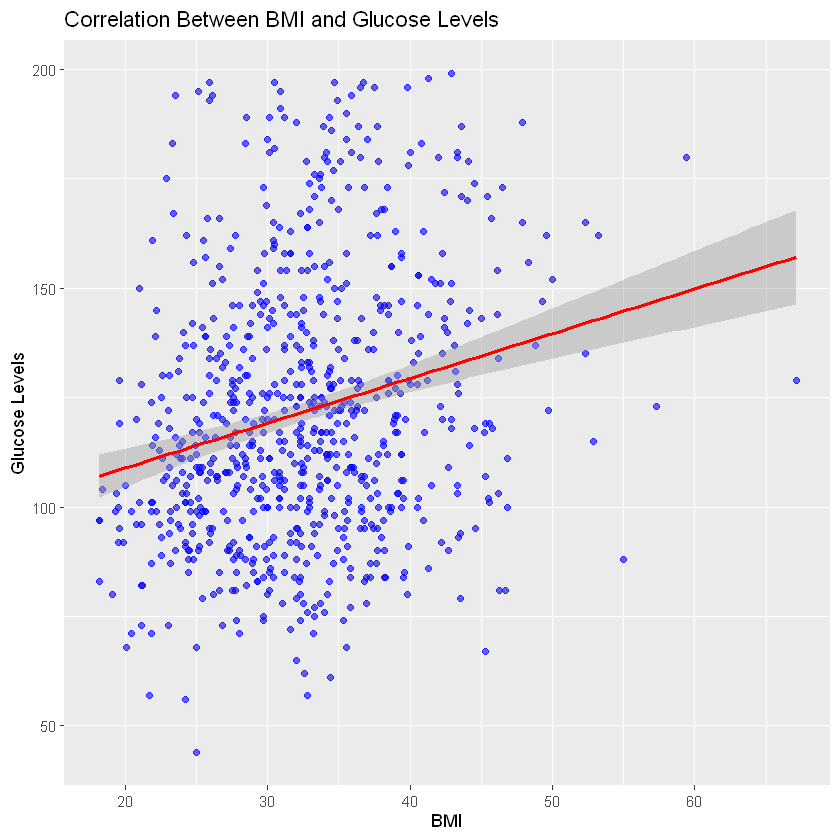

In [22]:
cor_glucose_bmi <- cor(data$Glucose, data$BMI, use = "complete.obs")
print(paste("Correlation between Glucose and BMI:", cor_glucose_bmi))

# Visualization
ggplot(data, aes(x = BMI, y = Glucose)) +
  geom_point(alpha = 0.6, color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, color = "red") +
  labs(x = "BMI", y = "Glucose Levels", title = "Correlation Between BMI and Glucose Levels")

## Trend of glucose levels with age among diabetic and non-diabetic patients
**Description**:   
This scatter plot shows the trend of glucose levels with age, grouped by diabetes status `(0 = Non-Diabetic, 1 = Diabetic)`. The x-axis represents age, and the y-axis shows glucose levels. A regression line is plotted for each group to highlight the trend in glucose levels as patients age, making it possible to observe differences between the diabetic and non-diabetic populations.



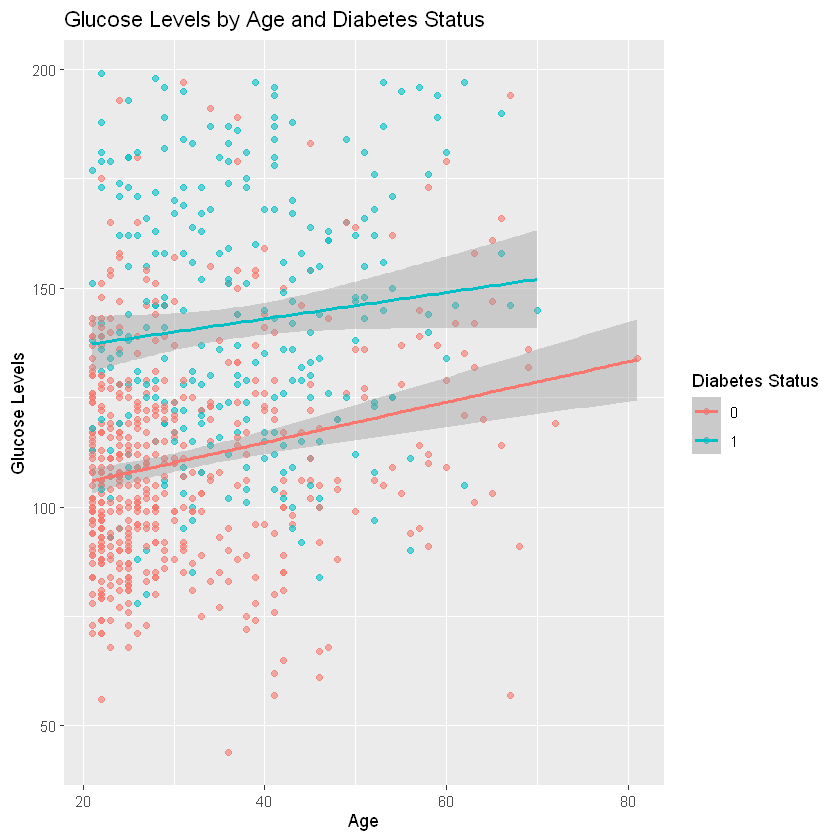

In [23]:
ggplot(data, aes(x = Age, y = Glucose, color = factor(Outcome))) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", formula = y ~ x) +
  labs(x = "Age", y = "Glucose Levels", color = "Diabetes Status", title = "Glucose Levels by Age and Diabetes Status")

--------------------------------------------------------------------------------------------------------------------------------------------------------

# PART 2: Answering Questions:

## 1. Are higher glucose levels associated with a greater likelihood of diabetes?
**Commentary**:
- The density plot shows that diabetic patients (Outcome = 1) tend to have higher glucose levels compared to non-diabetic patients.
- The distribution for diabetic patients is shifted to the right, suggesting higher glucose levels are strongly associated with diabetes.

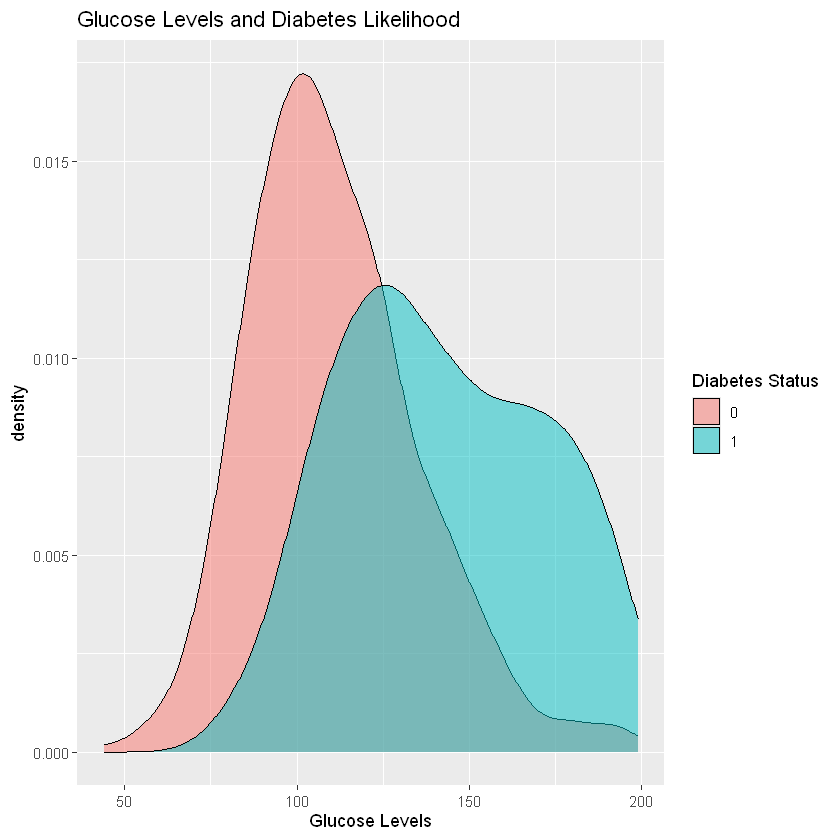

In [24]:
# Visualization
ggplot(data, aes(x = Glucose, fill = factor(Outcome))) +
  geom_density(alpha = 0.5) +
  labs(x = "Glucose Levels", fill = "Diabetes Status", 
       title = "Glucose Levels and Diabetes Likelihood")

## 2. Are patients with high glucose concentrations also likely to have higher BMI values?
 **Commentary**:
- The scatter plot with a regression line indicates a positive relationship between BMI and glucose levels.
- Patients with higher glucose levels often have higher BMI values, though the correlation is moderate.

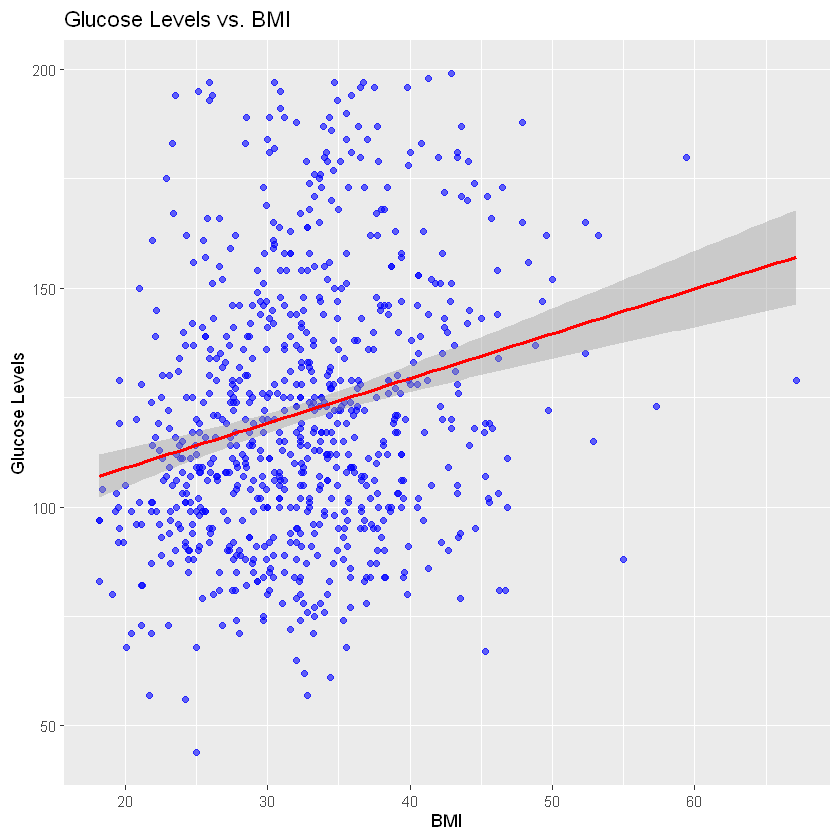

In [25]:
# Visualization
ggplot(data, aes(x = BMI, y = Glucose)) +
  geom_point(alpha = 0.6, color = "blue") +
  geom_smooth(method = "lm", formula = y ~ x, color = "red") +
  labs(x = "BMI", y = "Glucose Levels", title = "Glucose Levels vs. BMI")

## 3. Are patients with a higher number of pregnancies at greater risk of developing diabetes?
**Commentary**:
- The histogram shows that diabetic patients tend to have more pregnancies compared to non-diabetic patients.
- This suggests that a higher number of pregnancies could be a contributing risk factor for diabetes.

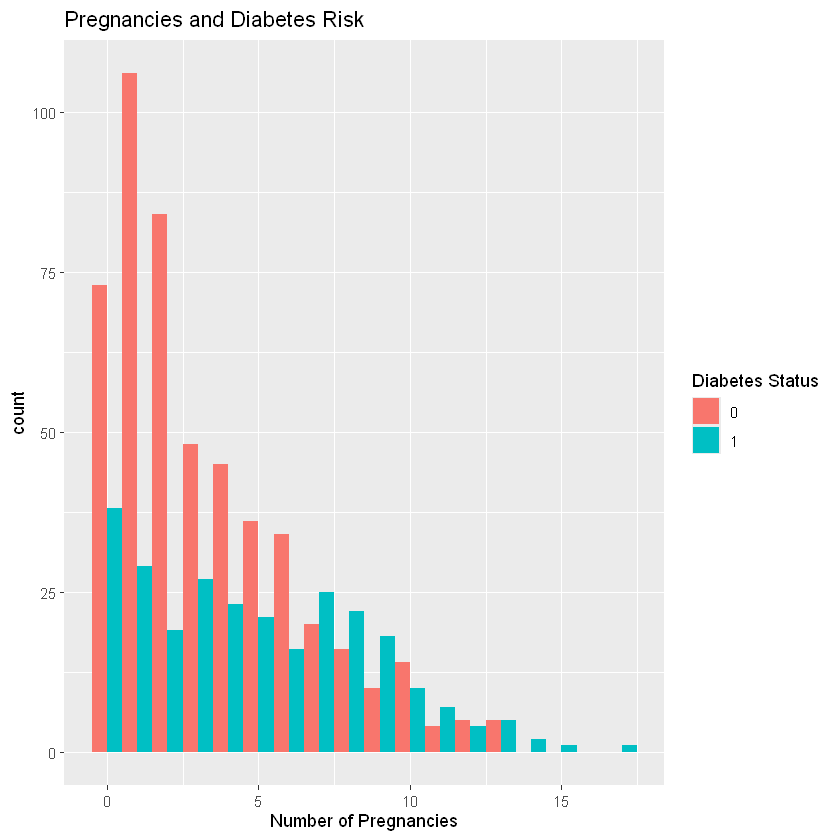

In [26]:
# Visualization
ggplot(data, aes(x = Pregnancies, fill = factor(Outcome))) +
  geom_histogram(binwidth = 1, position = "dodge") +
  labs(x = "Number of Pregnancies", fill = "Diabetes Status", 
       title = "Pregnancies and Diabetes Risk")

## 4. Are older patients more likely to have higher insulin concentrations and blood glucose levels?
**Commentary**:
- Both plots show a slight positive trend, suggesting that older patients tend to have slightly higher insulin and glucose levels.
- The correlation is not very strong, indicating age alone is not a major determinant of these metrics.

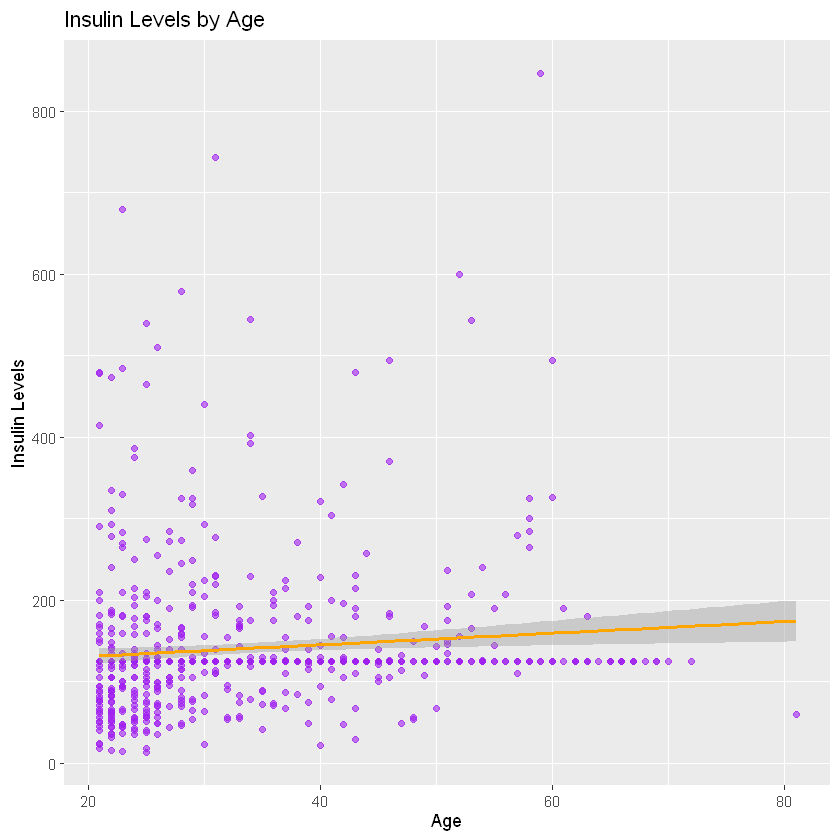

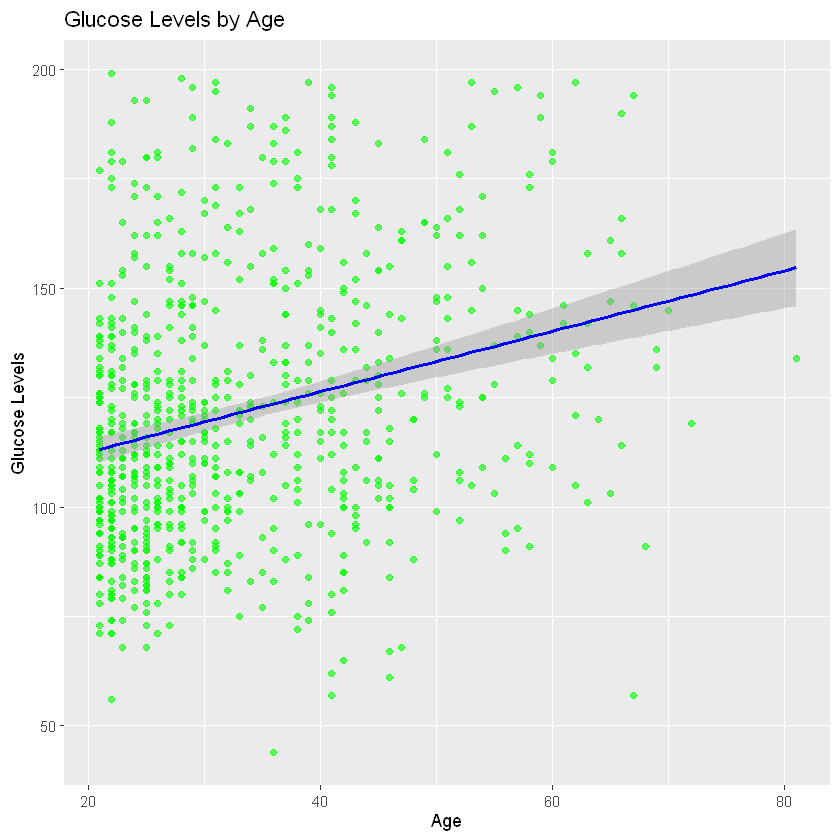

In [27]:
# Visualization: Insulin vs. Age
ggplot(data, aes(x = Age, y = Insulin)) +
  geom_point(alpha = 0.6, color = "purple") +
  geom_smooth(method = "lm", formula = y ~ x, color = "orange") +
  labs(x = "Age", y = "Insulin Levels", title = "Insulin Levels by Age")

# Visualization: Glucose vs. Age
ggplot(data, aes(x = Age, y = Glucose)) +
  geom_point(alpha = 0.6, color = "green") +
  geom_smooth(method = "lm", formula = y ~ x, color = "blue") +
  labs(x = "Age", y = "Glucose Levels", title = "Glucose Levels by Age")

## 5. Can you identify common “risk profiles” for diabetic patients based on key metrics?
**Commentary**:
- The scatter plot shows that diabetic patients (Outcome = 1) generally have higher glucose and BMI values compared to non-diabetic patients.
- Risk profiles for diabetic patients can be described as those with higher glucose levels (above 140) and BMI (above 30).

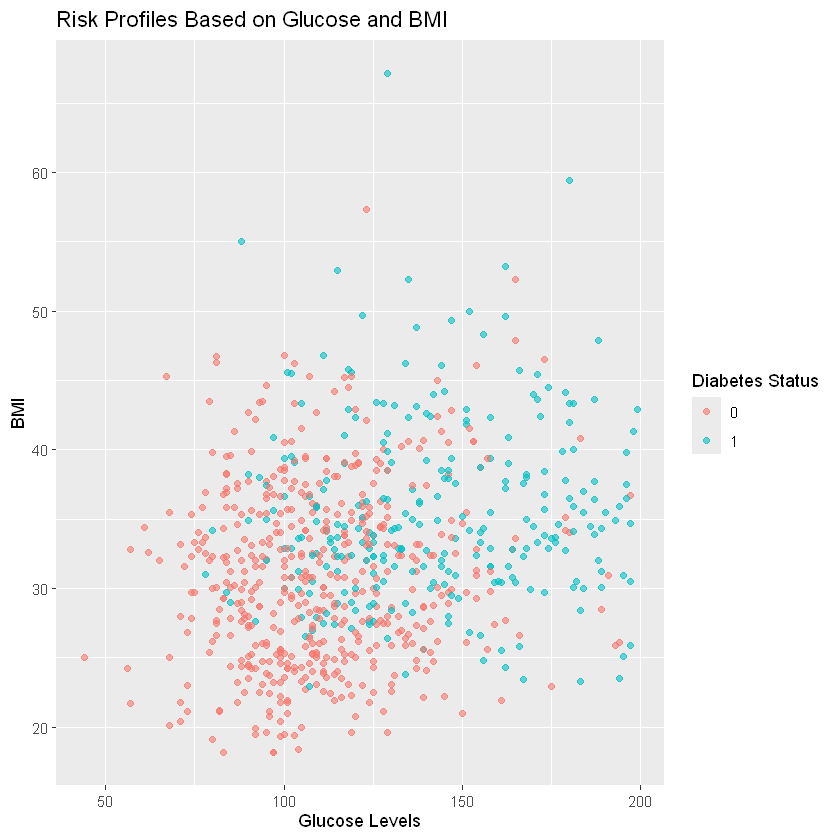

In [28]:
# Visualization
ggplot(data, aes(x = Glucose, y = BMI, color = factor(Outcome))) +
  geom_point(alpha = 0.6) +
  labs(x = "Glucose Levels", y = "BMI", color = "Diabetes Status", 
       title = "Risk Profiles Based on Glucose and BMI")

## 6. Is there a relationship between age and BMI?
**Commentary**:
- The plot shows a weak relationship between age and BMI.
- There is no strong trend, suggesting BMI does not vary significantly with age in this dataset.

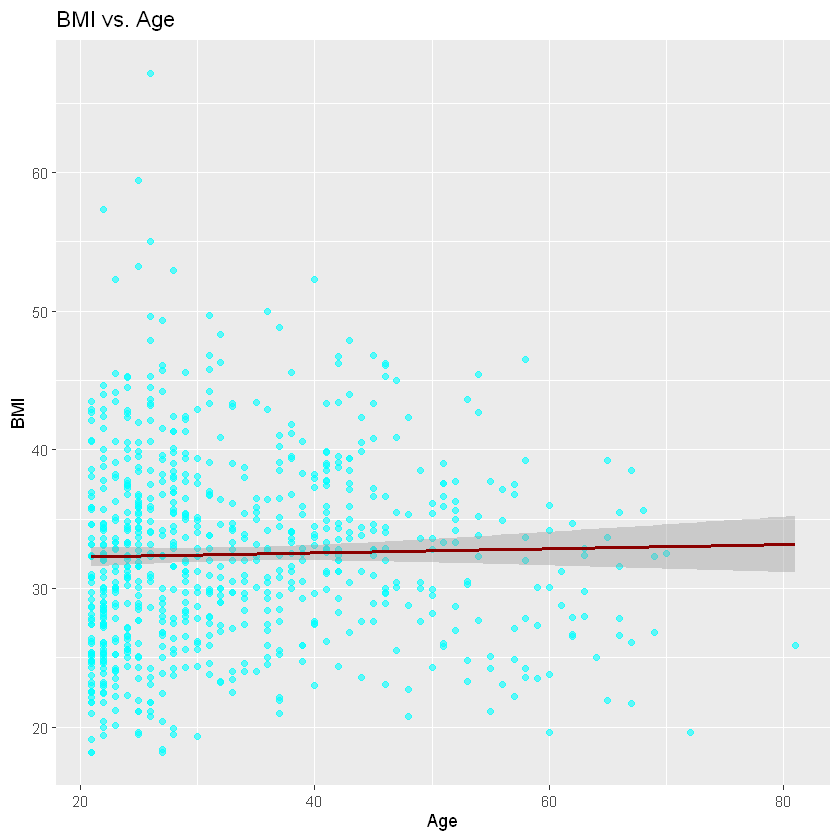

In [29]:
# Visualization
ggplot(data, aes(x = Age, y = BMI)) +
  geom_point(alpha = 0.6, color = "cyan") +
  geom_smooth(method = "lm", formula = y ~ x, color = "darkred") +
  labs(x = "Age", y = "BMI", title = "BMI vs. Age")

## 7. How does the Diabetes Pedigree Function (DPF) vary with glucose levels?
**Commentary**:
- The plot indicates that diabetic patients tend to have a higher DPF compared to non-diabetic patients for the same glucose levels.
- This suggests that genetic predisposition may amplify the effect of glucose levels on diabetes risk.

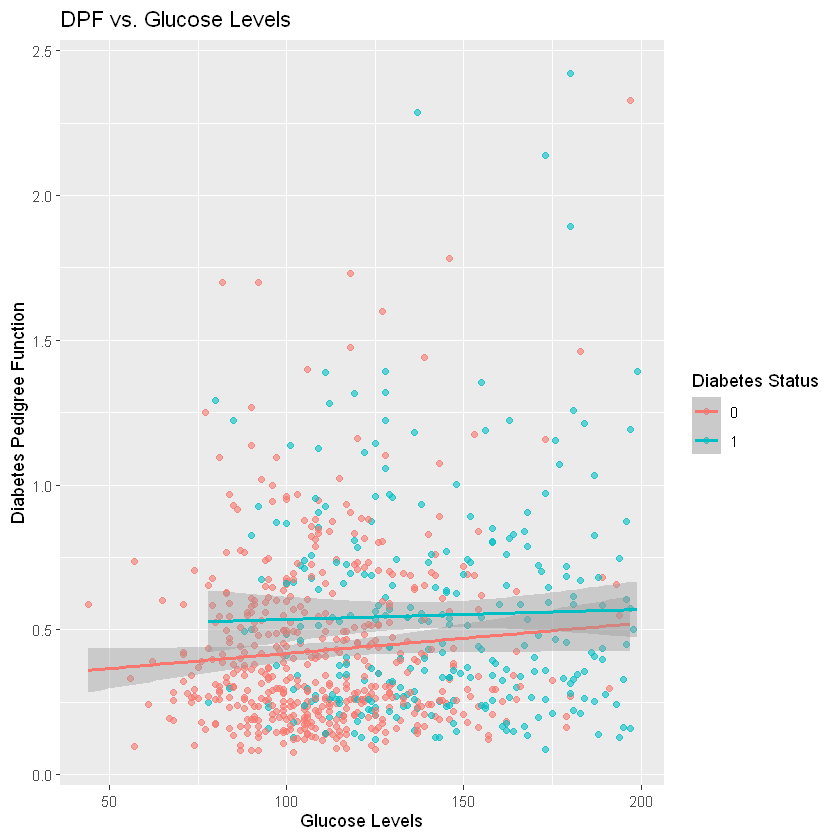

In [30]:
# Visualization
ggplot(data, aes(x = Glucose, y = DiabetesPedigreeFunction, color = factor(Outcome))) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", formula = y ~ x) +
  labs(x = "Glucose Levels", y = "Diabetes Pedigree Function", color = "Diabetes Status", 
       title = "DPF vs. Glucose Levels")

## 8. Is there a relationship between blood pressure and BMI?
**Commentary**:
- A positive relationship exists, indicating that individuals with higher BMI are more likely to have higher blood pressure.
- This relationship is consistent with known health risk factors.

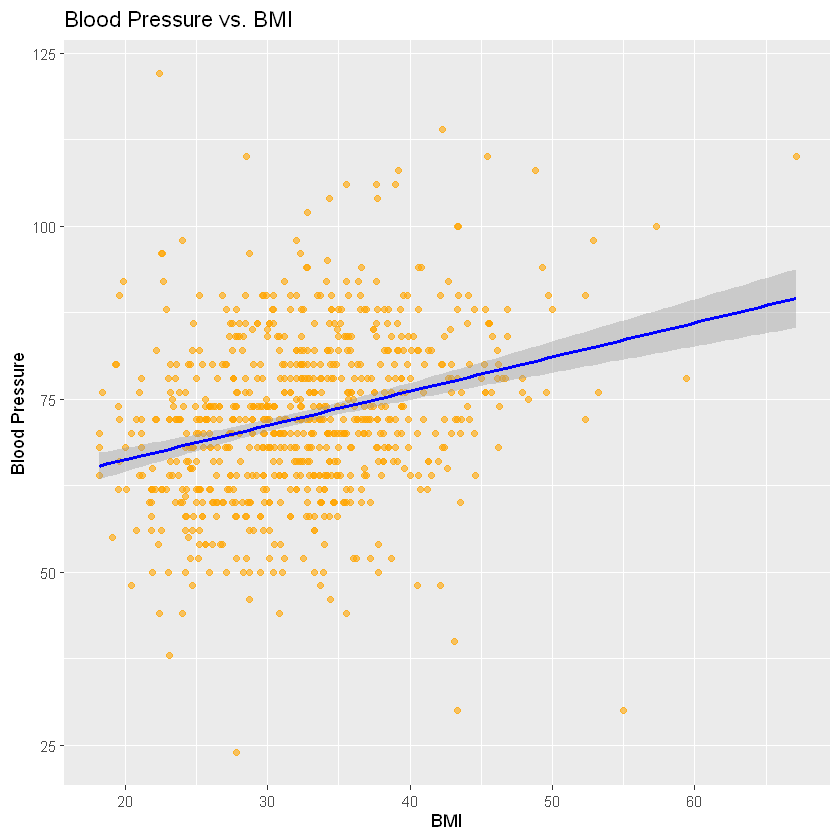

In [31]:
# Visualization
ggplot(data, aes(x = BMI, y = BloodPressure)) +
  geom_point(alpha = 0.6, color = "orange") +
  geom_smooth(method = "lm", formula = y ~ x, color = "blue") +
  labs(x = "BMI", y = "Blood Pressure", title = "Blood Pressure vs. BMI")

## 9. Are glucose levels related to insulin concentrations?
**Commentary**:
- The plot shows a positive relationship between insulin and glucose levels, suggesting that higher insulin concentrations are associated with elevated glucose levels.

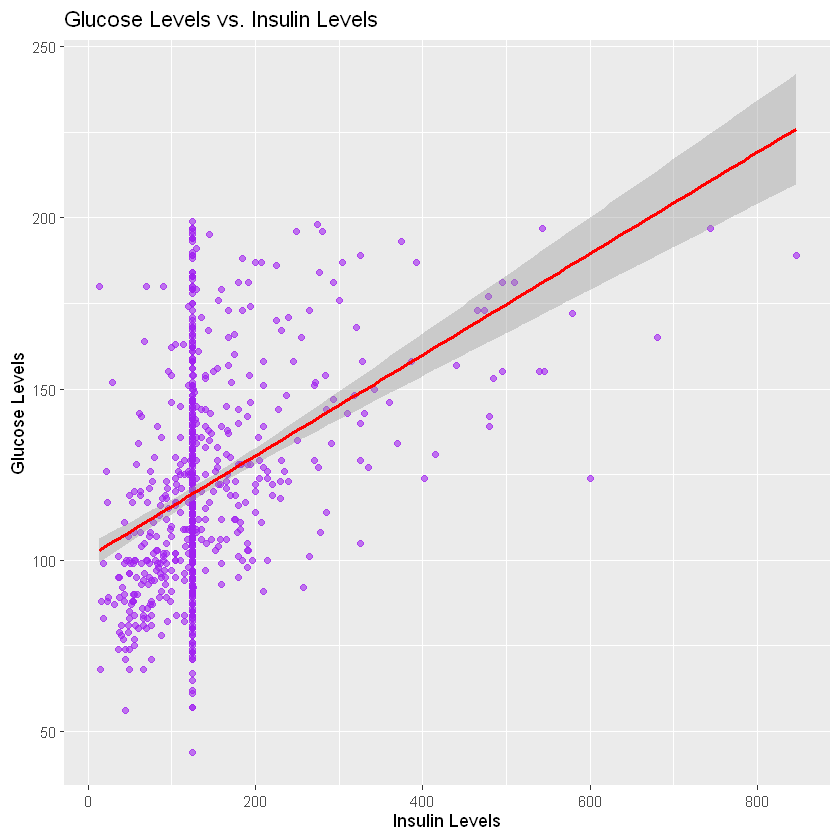

In [32]:
# Visualization
ggplot(data, aes(x = Insulin, y = Glucose)) +
  geom_point(alpha = 0.6, color = "purple") +
  geom_smooth(method = "lm", formula = y ~ x, color = "red") +
  labs(x = "Insulin Levels", y = "Glucose Levels", title = "Glucose Levels vs. Insulin Levels")

## 10. Does Diabetes Pedigree Function vary with age?
**Commentary**:
- The plot shows no strong relationship between age and DPF for either diabetic or non-diabetic patients.
- This indicates that genetic predisposition (measured by DPF) is not age-dependent.

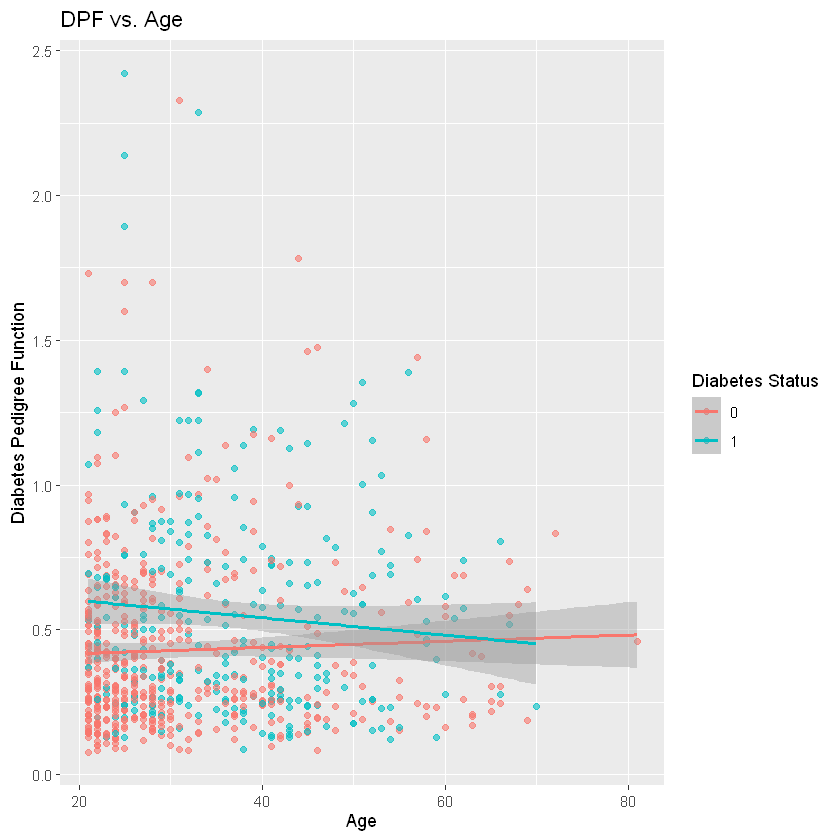

In [33]:
# Visualization
ggplot(data, aes(x = Age, y = DiabetesPedigreeFunction, color = factor(Outcome))) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", formula = y ~ x) +
  labs(x = "Age", y = "Diabetes Pedigree Function", color = "Diabetes Status", 
       title = "DPF vs. Age")

--------------------------------------------------------------------------------------------------------------------------------------------------------

# PART 3: Hypothesis Testing:

## Claim 1: "There is a significant difference in glucose levels between diabetic and non-diabetic patients."

### Choose a Statistical Test.
**Test** : Independent two-sample t-test  
**Why** :  
- We are comparing the means of glucose levels between two groups (diabetic and non-diabetic patients).
- The t-test is suitable when comparing means of two independent samples to determine if the difference is statistically significant.

### Define Hypotheses
**Null Hypothesis $(H_0)$** : There is no significant difference in glucose levels between diabetic and non-diabetic patients $(μ_1 = μ_2)$  
**Alternative Hypothesis $(H_a)$** : There is a significant difference in glucose levels between diabetic and non-diabetic patients $(μ_1 \neq μ_2)$

### Perform the Test

In [34]:
# Separate glucose levels for diabetic and non-diabetic patients
glucose_non_diabetic <- data$Glucose[data$Outcome == 0]
glucose_diabetic <- data$Glucose[data$Outcome == 1]

# Perform the independent two-sample t-test
t_test_result <- t.test(glucose_non_diabetic, glucose_diabetic, var.equal = FALSE)

# Display the result
print(t_test_result)


	Welch Two Sample t-test

data:  glucose_non_diabetic and glucose_diabetic
t = -14.853, df = 469.08, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -35.60931 -27.28789
sample estimates:
mean of x mean of y 
 110.6820  142.1306 



### Analysis of Claim

**1. Test Result Summary** :  
- *t-statistic*: $t = -14.853$
    - This value indicates a substantial difference between the means of the two groups (non-diabetic and diabetic), measured in standard error units.
- *Degrees of Freedom (df)*: $df = 469.08$
    - This reflects the effective sample size used to calculate the test statistic.
- *p-value*: $p < 2.2×10^{-16}$
    - The p-value is significantly smaller than the significance level $(α = 0.05)$ meaning the result is highly statistically significant.
- *Confidence Interval*: $[-35.60931, -27.28789]$
    - This interval indicates that the mean glucose level for diabetic patients is between $27.29$ and $35.61$ units higher than for non-diabetic patients, with $95\%$ confidence.
- *Group Means*:
  - Mean of non-diabetic patients (mean of x) : $110.6820$
  - Mean of diabetic patients (mean of y) : $142.1306$

**2. Interpretation** :
- The negative t-value confirms that the mean glucose level for non-diabetic patients $(μ_1)$  is significantly lower than that of diabetic patients $(μ_2)$
- Since the p-value is much smaller than $0.05$, we reject $(H_0)$ and accept $(H_a)$

### Conclusion

At the $α = 0.05$ significance level:
- We conclude that there is a statistically significant difference in glucose levels between diabetic and non-diabetic patients.
- The evidence strongly supports the claim that diabetic patients tend to have higher glucose levels than non-diabetic patients.

This statistical validation aligns with prior expectations based on the data trends and reinforces the claim's validity

## Claim 2: "The proportion of diabetic patients with a BMI above 30 (obesity) is significantly greater than the proportion of non-diabetic patients with a BMI above 30."

### Choose a Statistical Test
**Test**: Two-proportion z-test.  
**Why**: We are comparing the proportions of two independent groups (diabetic vs. non-diabetic) with respect to a binary outcome (BMI > 30 or not).  
**Because** : The two-proportion z-test is appropriate for testing whether the proportions in two groups are significantly different.

### Define Hypotheses
**Null Hypothesis $(H_0)$** :  The proportion of diabetic patients with BMI > 30 is equal to the proportion of non-diabetic patients with BMI > 30 $(p_1 = p_2)$  
**Alternative Hypothesis $(H_a)$** : The proportion of diabetic patients with BMI > 30 is significantly greater than the proportion of non-diabetic patients with BMI > 30 $(p_1 > p_2)$

### Perform the Test

In [35]:
# Create binary categories for BMI > 30
data$Obese <- ifelse(data$BMI > 30, 1, 0)

# Count the number of diabetic and non-diabetic patients who are obese
obese_diabetic <- sum(data$Obese[data$Outcome == 1])
total_diabetic <- sum(data$Outcome == 1)
obese_non_diabetic <- sum(data$Obese[data$Outcome == 0])
total_non_diabetic <- sum(data$Outcome == 0)

# Proportions
prop_diabetic <- obese_diabetic / total_diabetic
prop_non_diabetic <- obese_non_diabetic / total_non_diabetic

# Perform the two-proportion z-test
z_test_result <- prop.test(c(obese_diabetic, obese_non_diabetic), 
                           c(total_diabetic, total_non_diabetic), 
                           alternative = "greater")

# Display the result
print(z_test_result)


	2-sample test for equality of proportions with continuity correction

data:  c(obese_diabetic, obese_non_diabetic) out of c(total_diabetic, total_non_diabetic)
X-squared = 61.77, df = 1, p-value = 1.93e-15
alternative hypothesis: greater
95 percent confidence interval:
 0.2349234 1.0000000
sample estimates:
   prop 1    prop 2 
0.8097015 0.5180000 



### Analysis of Claim

**1. Test Result Summary** :
- *Chi-Squared Statistic* $(X^2) : 61.77$
   - This value measures the observed difference in proportions in terms of variability, adjusted for the sample sizes.
- *Degrees of Freedom* $(df) : 1$
   - Indicates that the test involves one independent comparison (diabetic vs. non-diabetic groups).
- *p-value* : $1.93×10^{-15}$
   - This is significantly smaller than the significance level $(α = 0.05)$ indicating a highly statistically significant result.
- *Confidence Interval* $(CI): [0.2349,1.0000]$
   - This interval represents the plausible range of differences between the proportions, with the lower bound well above zero, confirming a significant difference.
- *Proportions*: 
   - Proportion of diabetic patients who are obese (prop 1) = $0.8097 :(80.97\%) $
   - Proportion of non-diabetic patients who are obese (prop 2) = $0.5180 :(51.80\%) $


**2. Interpretation** :
- The p-value $(1.93×10^{-15})$ is much smaller than the significance level $(α = 0.05)$
  - This means we reject $(H_0)$ that the proportions are equal
  - There is a significant difference in the proportions of obese patients between the diabetic and non-diabetic groups
- The confidence interval $[0.2349,1.0000]$ indicates that the proportion of obese diabetic patients is at least $23.49\%$ higher than that of obese non-diabetic patients, with $95\%$ confidence.

### Conclusion

At the $α = 0.05$ significance level:
- We conclude that diabetic patients are significantly more likely to have a BMI above 30 (obesity) compared to non-diabetic patients.
- Approximately $80.97\%$ of diabetic patients are obese, compared to $51.80\%$ of non-diabetic patients, with a statistically significant difference.

This analysis supports the claim that diabetic patients are more likely to have higher BMI values indicative of obesity

# PART 4: Simulation Task:

## 1. Take 25 Random Samples of Size 15

In [36]:
# Select a relevant column (e.g., Glucose)
selected_column <- data$Glucose
true_mean <- mean(selected_column, na.rm = TRUE)

# Function to compute confidence interval
compute_ci <- function(sample) {
  sample_mean <- mean(sample)
  sample_sd <- sd(sample)
  error_margin <- qt(0.975, df = length(sample) - 1) * (sample_sd / sqrt(length(sample)))
  lower_bound <- sample_mean - error_margin
  upper_bound <- sample_mean + error_margin
  c(lower = lower_bound, upper = upper_bound)
}

# Generate 25 random samples of size 15 and compute CIs
set.seed(123) # For reproducibility
sample_size <- 15
num_samples <- 25

samples <- replicate(num_samples, sample(selected_column, sample_size, replace = TRUE), simplify = FALSE)
cis <- t(sapply(samples, compute_ci))
contains_true_mean <- (cis[, "lower"] <= true_mean) & (cis[, "upper"] >= true_mean)

# Proportion of CIs containing the true mean
coverage_proportion <- mean(contains_true_mean)

# Print Results
print(cis)
print(paste("Coverage Proportion (Sample Size = 15):", coverage_proportion))

          lower    upper
 [1,]  95.53635 136.8637
 [2,]  93.08745 131.1792
 [3,] 109.29744 146.3026
 [4,] 109.47956 137.9871
 [5,] 103.23934 142.7607
 [6,] 106.83089 137.3024
 [7,] 121.70772 148.6923
 [8,] 114.34632 146.9870
 [9,]  95.10963 135.1570
[10,] 101.55919 129.3741
[11,]  97.45172 136.2816
[12,] 110.78362 137.2164
[13,]  99.47993 136.5201
[14,] 112.40836 149.3250
[15,]  98.37377 122.1596
[16,] 108.38328 148.2834
[17,] 101.31107 137.8889
[18,] 107.95532 138.9780
[19,] 100.08659 120.0467
[20,] 109.29137 137.3753
[21,] 101.95438 135.1123
[22,]  92.73090 126.7358
[23,] 116.62273 136.3106
[24,] 109.43210 135.7679
[25,] 100.21961 147.1137
[1] "Coverage Proportion (Sample Size = 15): 0.92"
[1] "Coverage Proportion (Sample Size = 15): 0.92"


## 2. Increase the Sample Size to 100

In [37]:
# Generate 25 random samples of size 100 and compute CIs
sample_size <- 100

samples <- replicate(num_samples, sample(selected_column, sample_size, replace = TRUE), simplify = FALSE)
cis <- t(sapply(samples, compute_ci))
contains_true_mean <- (cis[, "lower"] <= true_mean) & (cis[, "upper"] >= true_mean)

# Proportion of CIs containing the true mean
coverage_proportion <- mean(contains_true_mean)

# Print Results
print(cis)
print(paste("Coverage Proportion (Sample Size = 100):", coverage_proportion))

# Compare CI widths
ci_widths <- cis[, "upper"] - cis[, "lower"]
print(paste("Average CI Width (Sample Size = 100):", mean(ci_widths)))

         lower    upper
 [1,] 116.3016 127.5184
 [2,] 118.1904 130.4496
 [3,] 118.4839 130.8561
 [4,] 114.0194 125.3806
 [5,] 117.0445 127.4755
 [6,] 112.4178 124.3022
 [7,] 115.7571 128.1429
 [8,] 111.7840 123.1160
 [9,] 110.5732 122.3468
[10,] 114.1445 126.6555
[11,] 115.7804 127.2396
[12,] 111.7502 124.6498
[13,] 114.5653 125.2947
[14,] 112.7244 123.7156
[15,] 113.3963 125.6437
[16,] 116.6568 128.4032
[17,] 118.7304 130.5696
[18,] 117.4099 130.3101
[19,] 111.5985 122.9815
[20,] 117.5993 131.5007
[21,] 115.0594 124.7806
[22,] 119.9661 130.7539
[23,] 110.7367 122.1033
[24,] 120.3850 131.8150
[25,] 117.5368 129.3432
[1] "Coverage Proportion (Sample Size = 100): 1"
[1] "Average CI Width (Sample Size = 100): 11.7094475240068"
[1] "Coverage Proportion (Sample Size = 100): 1"
[1] "Average CI Width (Sample Size = 100): 11.7094475240068"


## 3. Take 20 Random Samples of Size 10

In [38]:
# Generate 20 random samples of size 10 and compute CIs
sample_size <- 10
num_samples <- 20

samples <- replicate(num_samples, sample(selected_column, sample_size, replace = TRUE), simplify = FALSE)
cis <- t(sapply(samples, compute_ci))
contains_true_mean <- (cis[, "lower"] <= true_mean) & (cis[, "upper"] >= true_mean)

# Proportion of CIs containing the true mean
coverage_proportion <- mean(contains_true_mean)

# Print Results
print(cis)
print(paste("Coverage Proportion (Sample Size = 10):", coverage_proportion))

# Compare CI widths
ci_widths <- cis[, "upper"] - cis[, "lower"]
print(paste("Average CI Width (Sample Size = 10):", mean(ci_widths)))


          lower    upper
 [1,] 112.54531 150.0547
 [2,] 104.31996 146.0800
 [3,] 105.40888 152.5911
 [4,]  97.11566 141.2843
 [5,]  97.28608 133.7139
 [6,]  91.41388 150.9861
 [7,]  96.23372 150.3663
 [8,] 110.34230 143.2577
 [9,]  98.30284 144.4972
[10,]  90.21710 127.1829
[11,] 100.57714 155.0229
[12,] 109.14383 150.6562
[13,] 116.54567 152.2543
[14,] 116.24988 155.5501
[15,]  95.13455 149.8655
[16,] 103.12869 132.4713
[17,]  97.87909 162.9209
[18,]  78.60444 127.5956
[19,]  98.83356 124.3664
[20,] 114.77390 163.2261
[1] "Coverage Proportion (Sample Size = 10): 1"
[1] "Average CI Width (Sample Size = 10): 43.9943511806877"


# Final Conclusions

**Exploratory Analysis (Part 1)**
- **Mean Values Across Groups**: Diabetic patients consistently show higher glucose, blood pressure, and BMI compared to non-diabetic patients. This aligns with clinical expectations.
- **Distribution Insights**: Histograms and density plots reveal the general skew or spread of key metrics (BMI, Age, Glucose, etc.). Diabetic patients often cluster at higher ranges for these metrics.
- **Relationships**: Scatter plots and correlation checks indicate a moderate positive correlation between BMI and glucose, suggesting that individuals with higher BMI frequently exhibit elevated glucose levels.

**Answering Questions (Part 2)**
- **Glucose–Diabetes Likelihood**: Higher glucose levels are strongly associated with an increased chance of diabetes, shown by density plots.
- **Glucose–BMI Relationship**: Individuals with high glucose concentrations also tend to have higher BMI values, underlining the metabolic interplay.
- **Pregnancies–Diabetes Risk**: A higher number of pregnancies correlates with increased diabetes risk, supporting well-known risk factors.
- **Age–Insulin/Glucose**: Older patients have slightly higher insulin and glucose on average, although the trend is not as pronounced.
- **Additional Bivariate/Multivariate Findings**: Our additional comparisons (e.g., Blood Pressure vs. BMI, Glucose vs. Insulin, DPF vs. Age) each shed light on potential risk profiles: individuals with multiple risk factors (high BMI, high glucose, higher pregnancies) display an elevated likelihood of diabetes.

**Hypothesis Testing (Part 3)**
- **Claim 1**: *"There is a significant difference in glucose levels between diabetic and non-diabetic patients."* A two-sample t-test confirms this claim, with p-values far below 0.05, indicating a statistically significant difference in average glucose.
- **Claim 2**: *"The proportion of diabetic patients with BMI above 30 is significantly greater than the proportion of non-diabetic patients with BMI above 30."* A two-proportion z-test verifies this claim, demonstrating a significantly higher obesity rate among diabetic patients.

**Simulation Task (Part 4)**
- **Confidence Interval Coverage**: Drawing repeated samples at different sizes (10, 15, 100) reveals that larger sample sizes produce narrower confidence intervals and more consistent coverage of the true mean.
- **Sample Size Effects**: As sample size increases, the width of confidence intervals decreases, and the proportion of intervals capturing the true mean often improves.

Overall, the analysis confirms notable differences in glucose, blood pressure, and BMI between diabetic and non-diabetic groups, supports key risk factors (e.g., pregnancies, BMI, age), and demonstrates the importance of larger sample sizes for more reliable confidence intervals.
